# DQNの解説

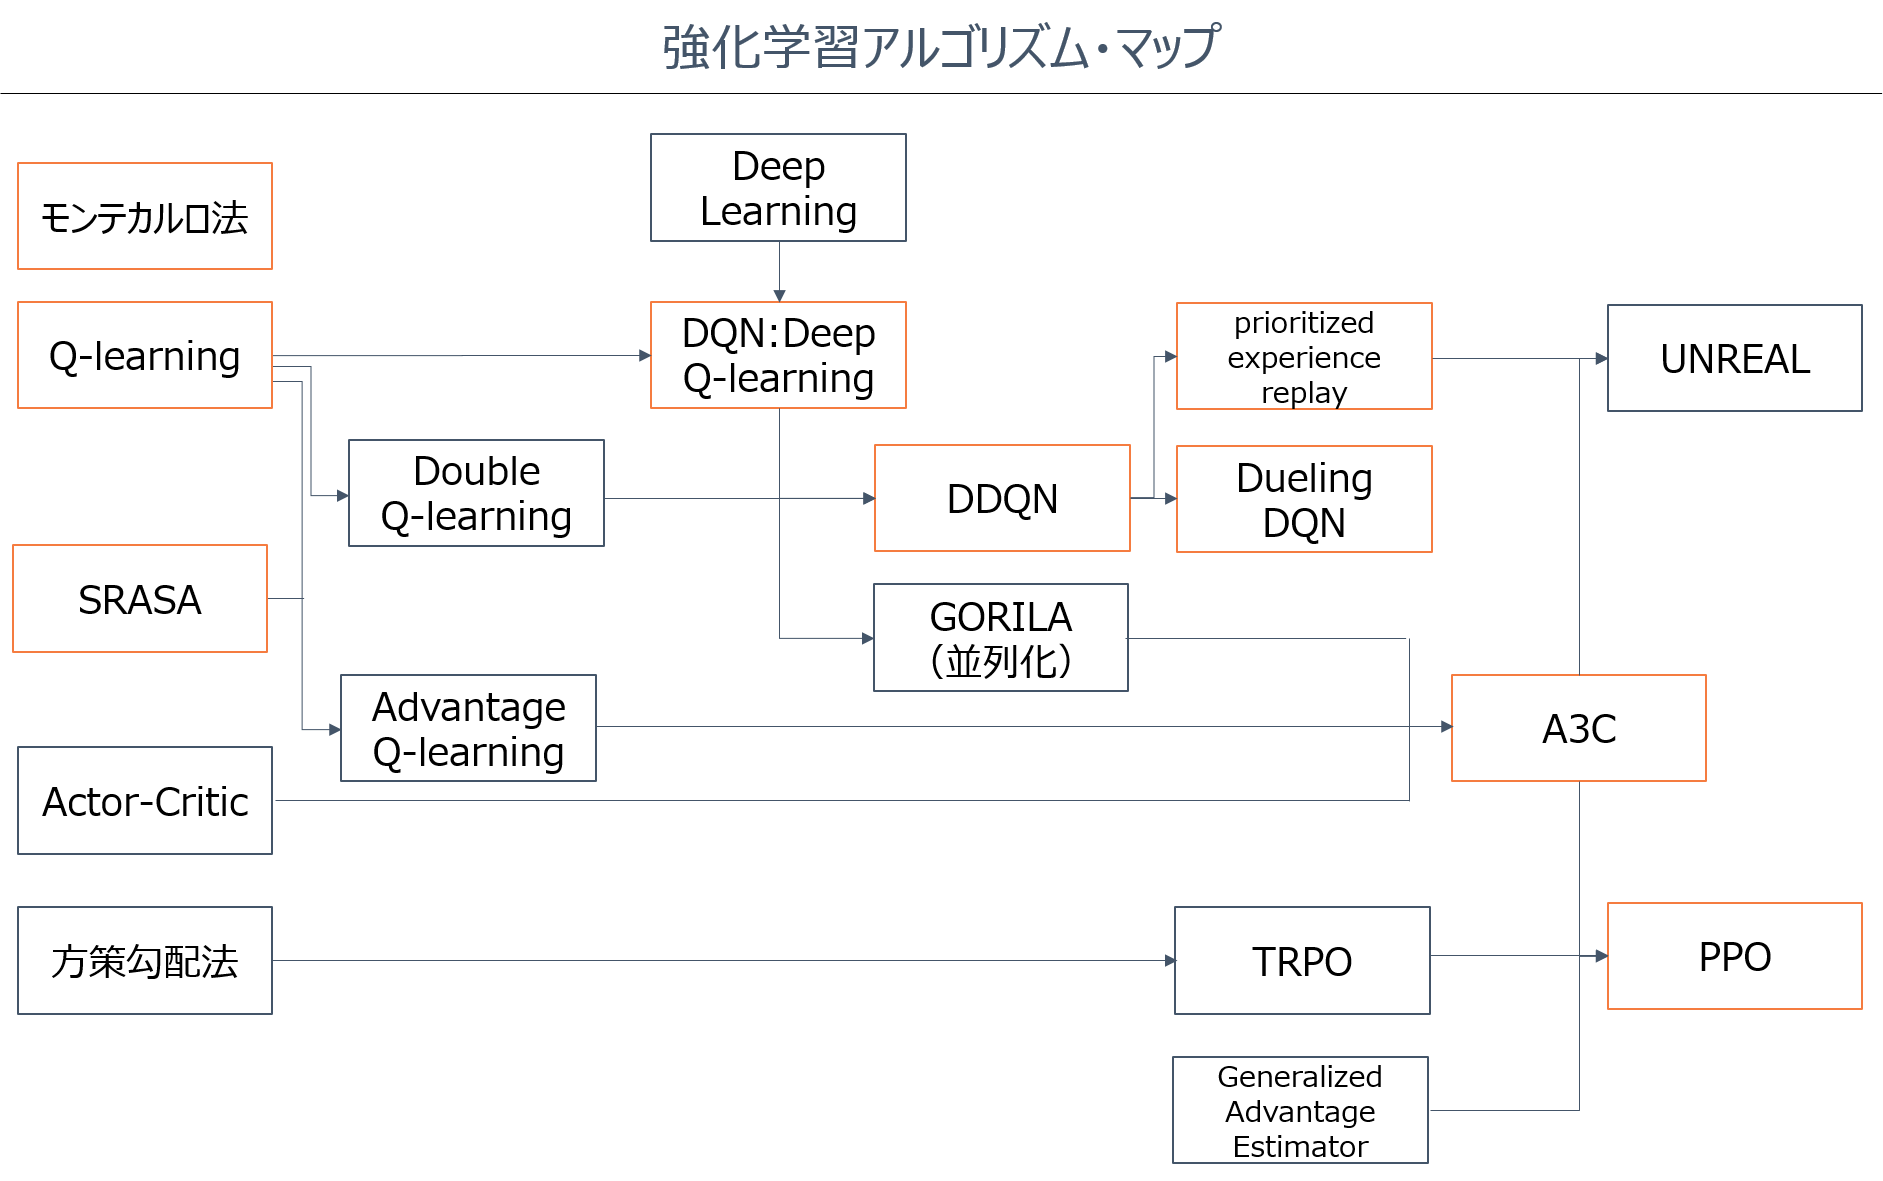

画像引用:  
https://qiita.com/sugulu/items/3c7d6cbe600d455e853b

### DQNの特徴
- Q学習において状態行動テーブルを関数で表したもの.
- 離散的な行動を扱うことができる.

参考:  
http://blog.syundo.org/post/20171208-reinforcement-learning-dqn-and-impl/

In [1]:
import gym
import numpy as np
import renom as rm
import matplotlib.pyplot as plt
from renom.utility.initializer import Gaussian
from renom.cuda import set_cuda_active
from renom_rl.dqn import DQN
from renom_rl.env import BaseEnv
from gym.core import Env
from PIL import Image

set_cuda_active(True)
env = gym.make('BreakoutNoFrameskip-v4')

class CustomEnv(BaseEnv):
    
    def __init__(self, env):
        self.env = env
        self.action_shape = 4
        self.state_shape = (4, 84, 84)
        self.previous_frames = []
        super(CustomEnv, self).__init__()
    
    def reset(self):
        self.env.reset()
        n_step = np.random.randint(4, 32+1)
        for _ in range(n_step):
            state, _, _ = self.step(self.env.action_space.sample())
        return state
    
    def sample(self):
        return self.env.action_space.sample()
    
    def render(self):
        self.env.render()

    def _preprocess(self,state):
        resized_image = Image.fromarray(state).resize((84, 84)).convert('L')
        # image_array = np.asarray(resized_image.getdata()).reshape(110, 84)/255.
        # final_image = image_array[26:110, :]
        final_image = np.asarray(resized_image.getdata()).reshape(84, 84)/255.
        return final_image
    
    def step(self, action):
        state_list = []
        reward_list = []
        terminal = False
        for _ in range(4):
            # Use last frame. Other frames will be skipped.
            s, r, t, _ = self.env.step(action)
            state = self._preprocess(s)
            reward_list.append(r)
            if t:
                terminal = True
                
        if len(self.previous_frames) > 3:
            self.previous_frames = self.previous_frames[1:] + [state]
        else:
            self.previous_frames += [state]
        state = np.stack(self.previous_frames)
        return state, np.sum(reward_list), terminal
    
custom_env = CustomEnv(env)
q_network = rm.Sequential([rm.Conv2d(32, filter=8, stride=4),
                           rm.Relu(),
                           rm.Conv2d(64, filter=4, stride=2), 
                           rm.Relu(),
                           rm.Conv2d(64, filter=3, stride=1), 
                           rm.Relu(), 
                           rm.Flatten(), 
                           rm.Dense(512),
                           rm.Relu(),
                           rm.Dense(custom_env.action_shape)])

In [2]:
model = DQN(custom_env, q_network)

In [3]:
model.fit(render=True, greedy_step=1000000)

Run random 5000 step for storing experiences


episode 001 avg_loss: 0.006 total_reward [train:0.000 test:-] e-greedy:0.000: : 116it [00:02, 40.32it/s]
episode 002 avg_loss: 0.005 total_reward [train:4.000 test:-] e-greedy:0.000: : 238it [00:05, 44.29it/s]
episode 003 avg_loss: 0.005 total_reward [train:2.000 test:-] e-greedy:0.000: : 187it [00:04, 44.84it/s]
episode 004 avg_loss: 0.005 total_reward [train:0.000 test:-] e-greedy:0.001: : 120it [00:02, 44.31it/s]
episode 005 avg_loss: 0.005 total_reward [train:0.000 test:-] e-greedy:0.001: : 115it [00:02, 40.54it/s]
episode 006 avg_loss: 0.004 total_reward [train:2.000 test:-] e-greedy:0.001: : 174it [00:03, 43.57it/s]
episode 007 avg_loss: 0.005 total_reward [train:0.000 test:-] e-greedy:0.001: : 107it [00:02, 43.28it/s]
episode 008 avg_loss: 0.005 total_reward [train:3.000 test:-] e-greedy:0.001: : 218it [00:04, 44.77it/s]
episode 009 avg_loss: 0.004 total_reward [train:0.000 test:-] e-greedy:0.001: : 125it [00:02, 43.84it/s]
episode 010 avg_loss: 0.005 total_reward [train:0.000 t

episode 156 avg_loss: 0.002 total_reward [train:1.000 test:-] e-greedy:0.022: : 144it [00:03, 44.47it/s]
episode 157 avg_loss: 0.002 total_reward [train:3.000 test:-] e-greedy:0.023: : 271it [00:06, 44.25it/s]
episode 158 avg_loss: 0.002 total_reward [train:0.000 test:-] e-greedy:0.023: : 107it [00:02, 43.05it/s]
episode 159 avg_loss: 0.002 total_reward [train:1.000 test:-] e-greedy:0.023: : 171it [00:03, 44.27it/s]
episode 160 avg_loss: 0.001 total_reward [train:5.000 test:-] e-greedy:0.023: : 303it [00:06, 44.52it/s]
episode 161 avg_loss: 0.002 total_reward [train:1.000 test:-] e-greedy:0.023: : 156it [00:03, 44.25it/s]
episode 162 avg_loss: 0.002 total_reward [train:0.000 test:-] e-greedy:0.023: : 137it [00:03, 43.53it/s]
episode 163 avg_loss: 0.002 total_reward [train:2.000 test:-] e-greedy:0.024: : 193it [00:04, 44.09it/s]
episode 164 avg_loss: 0.002 total_reward [train:0.000 test:-] e-greedy:0.024: : 109it [00:02, 44.78it/s]
episode 165 avg_loss: 0.002 total_reward [train:0.000 t

episode 310 avg_loss: 0.002 total_reward [train:1.000 test:-] e-greedy:0.044: : 172it [00:04, 42.96it/s]
episode 311 avg_loss: 0.001 total_reward [train:0.000 test:-] e-greedy:0.044: : 125it [00:02, 45.66it/s]
episode 312 avg_loss: 0.001 total_reward [train:0.000 test:-] e-greedy:0.045: : 117it [00:02, 44.56it/s]
episode 313 avg_loss: 0.001 total_reward [train:2.000 test:-] e-greedy:0.045: : 201it [00:04, 44.34it/s]
episode 314 avg_loss: 0.002 total_reward [train:3.000 test:-] e-greedy:0.045: : 206it [00:04, 44.14it/s]
episode 315 avg_loss: 0.002 total_reward [train:3.000 test:-] e-greedy:0.045: : 246it [00:05, 42.91it/s]
episode 316 avg_loss: 0.002 total_reward [train:0.000 test:-] e-greedy:0.045: : 117it [00:02, 41.92it/s]
episode 317 avg_loss: 0.002 total_reward [train:0.000 test:-] e-greedy:0.045: : 107it [00:02, 42.95it/s]
episode 318 avg_loss: 0.002 total_reward [train:2.000 test:-] e-greedy:0.046: : 199it [00:04, 43.42it/s]
episode 319 avg_loss: 0.002 total_reward [train:0.000 t

episode 465 avg_loss: 0.001 total_reward [train:0.000 test:-] e-greedy:0.067: : 127it [00:02, 43.18it/s]
episode 466 avg_loss: 0.002 total_reward [train:3.000 test:-] e-greedy:0.068: : 230it [00:05, 44.81it/s]
episode 467 avg_loss: 0.001 total_reward [train:0.000 test:-] e-greedy:0.068: : 109it [00:02, 43.79it/s]
episode 468 avg_loss: 0.002 total_reward [train:1.000 test:-] e-greedy:0.068: : 156it [00:03, 43.97it/s]
episode 469 avg_loss: 0.002 total_reward [train:0.000 test:-] e-greedy:0.068: : 118it [00:02, 44.28it/s]
episode 470 avg_loss: 0.001 total_reward [train:0.000 test:-] e-greedy:0.068: : 114it [00:02, 43.17it/s]
episode 471 avg_loss: 0.002 total_reward [train:0.000 test:-] e-greedy:0.068: : 118it [00:02, 44.17it/s]
episode 472 avg_loss: 0.001 total_reward [train:2.000 test:-] e-greedy:0.068: : 189it [00:04, 44.35it/s]
episode 473 avg_loss: 0.002 total_reward [train:1.000 test:-] e-greedy:0.069: : 167it [00:03, 44.02it/s]
episode 474 avg_loss: 0.001 total_reward [train:1.000 t

episode 619 avg_loss: 0.001 total_reward [train:2.000 test:-] e-greedy:0.090: : 180it [00:04, 42.86it/s]
episode 620 avg_loss: 0.001 total_reward [train:0.000 test:-] e-greedy:0.090: : 104it [00:02, 44.10it/s]
episode 621 avg_loss: 0.001 total_reward [train:2.000 test:-] e-greedy:0.090: : 198it [00:04, 43.35it/s]
episode 622 avg_loss: 0.002 total_reward [train:2.000 test:-] e-greedy:0.090: : 189it [00:04, 43.90it/s]
episode 623 avg_loss: 0.003 total_reward [train:0.000 test:-] e-greedy:0.090: : 128it [00:02, 43.32it/s]
episode 624 avg_loss: 0.002 total_reward [train:1.000 test:-] e-greedy:0.090: : 149it [00:03, 44.01it/s]
episode 625 avg_loss: 0.002 total_reward [train:0.000 test:-] e-greedy:0.090: : 144it [00:03, 44.49it/s]
episode 626 avg_loss: 0.002 total_reward [train:5.000 test:-] e-greedy:0.091: : 297it [00:06, 44.20it/s]
episode 627 avg_loss: 0.002 total_reward [train:0.000 test:-] e-greedy:0.091: : 123it [00:02, 42.66it/s]
episode 628 avg_loss: 0.002 total_reward [train:0.000 t

episode 773 avg_loss: 0.002 total_reward [train:2.000 test:-] e-greedy:0.112: : 159it [00:03, 43.39it/s]
episode 774 avg_loss: 0.003 total_reward [train:0.000 test:-] e-greedy:0.113: : 119it [00:02, 44.24it/s]
episode 775 avg_loss: 0.002 total_reward [train:1.000 test:-] e-greedy:0.113: : 170it [00:03, 44.27it/s]
episode 776 avg_loss: 0.002 total_reward [train:0.000 test:-] e-greedy:0.113: : 109it [00:02, 42.83it/s]
episode 777 avg_loss: 0.002 total_reward [train:4.000 test:-] e-greedy:0.113: : 318it [00:07, 43.83it/s]
episode 778 avg_loss: 0.002 total_reward [train:1.000 test:-] e-greedy:0.113: : 160it [00:03, 45.84it/s]
episode 779 avg_loss: 0.001 total_reward [train:2.000 test:-] e-greedy:0.113: : 184it [00:04, 43.52it/s]
episode 780 avg_loss: 0.002 total_reward [train:3.000 test:-] e-greedy:0.114: : 238it [00:05, 43.51it/s]
episode 781 avg_loss: 0.001 total_reward [train:2.000 test:-] e-greedy:0.114: : 194it [00:04, 43.34it/s]
episode 782 avg_loss: 0.002 total_reward [train:1.000 t

episode 927 avg_loss: 0.002 total_reward [train:1.000 test:-] e-greedy:0.136: : 164it [00:03, 44.52it/s]
episode 928 avg_loss: 0.001 total_reward [train:0.000 test:-] e-greedy:0.136: : 124it [00:02, 43.17it/s]
episode 929 avg_loss: 0.002 total_reward [train:0.000 test:-] e-greedy:0.136: : 140it [00:03, 45.14it/s]
episode 930 avg_loss: 0.002 total_reward [train:0.000 test:-] e-greedy:0.136: : 120it [00:02, 44.54it/s]
episode 931 avg_loss: 0.002 total_reward [train:2.000 test:-] e-greedy:0.136: : 200it [00:04, 44.83it/s]
episode 932 avg_loss: 0.002 total_reward [train:0.000 test:-] e-greedy:0.136: : 118it [00:02, 43.91it/s]
episode 933 avg_loss: 0.002 total_reward [train:2.000 test:-] e-greedy:0.136: : 216it [00:04, 43.41it/s]
episode 934 avg_loss: 0.002 total_reward [train:1.000 test:-] e-greedy:0.137: : 163it [00:03, 43.83it/s]
episode 935 avg_loss: 0.002 total_reward [train:2.000 test:-] e-greedy:0.137: : 194it [00:04, 44.51it/s]
episode 936 avg_loss: 0.002 total_reward [train:2.000 t

episode 1081 avg_loss: 0.002 total_reward [train:0.000 test:-] e-greedy:0.159: : 142it [00:03, 44.40it/s]
episode 1082 avg_loss: 0.001 total_reward [train:0.000 test:-] e-greedy:0.159: : 106it [00:02, 42.98it/s]
episode 1083 avg_loss: 0.002 total_reward [train:0.000 test:-] e-greedy:0.159: : 134it [00:03, 43.05it/s]
episode 1084 avg_loss: 0.002 total_reward [train:2.000 test:-] e-greedy:0.159: : 199it [00:04, 44.25it/s]
episode 1085 avg_loss: 0.002 total_reward [train:1.000 test:-] e-greedy:0.159: : 172it [00:03, 44.36it/s]
episode 1086 avg_loss: 0.002 total_reward [train:2.000 test:-] e-greedy:0.160: : 197it [00:04, 44.77it/s]
episode 1087 avg_loss: 0.002 total_reward [train:0.000 test:-] e-greedy:0.160: : 115it [00:02, 45.11it/s]
episode 1088 avg_loss: 0.002 total_reward [train:2.000 test:-] e-greedy:0.160: : 218it [00:04, 43.97it/s]
episode 1089 avg_loss: 0.002 total_reward [train:2.000 test:-] e-greedy:0.160: : 214it [00:04, 44.27it/s]
episode 1090 avg_loss: 0.002 total_reward [tra

episode 1235 avg_loss: 0.002 total_reward [train:3.000 test:-] e-greedy:0.182: : 263it [00:05, 44.07it/s]
episode 1236 avg_loss: 0.002 total_reward [train:2.000 test:-] e-greedy:0.182: : 205it [00:04, 44.00it/s]
episode 1237 avg_loss: 0.002 total_reward [train:2.000 test:-] e-greedy:0.182: : 197it [00:04, 44.33it/s]
episode 1238 avg_loss: 0.002 total_reward [train:0.000 test:-] e-greedy:0.182: : 111it [00:02, 43.36it/s]
episode 1239 avg_loss: 0.001 total_reward [train:2.000 test:-] e-greedy:0.182: : 197it [00:04, 44.13it/s]
episode 1240 avg_loss: 0.002 total_reward [train:2.000 test:-] e-greedy:0.183: : 188it [00:04, 44.18it/s]
episode 1241 avg_loss: 0.002 total_reward [train:3.000 test:-] e-greedy:0.183: : 236it [00:05, 44.26it/s]
episode 1242 avg_loss: 0.002 total_reward [train:2.000 test:-] e-greedy:0.183: : 183it [00:04, 43.73it/s]
episode 1243 avg_loss: 0.002 total_reward [train:0.000 test:-] e-greedy:0.183: : 122it [00:02, 43.53it/s]
episode 1244 avg_loss: 0.002 total_reward [tra

episode 1389 avg_loss: 0.001 total_reward [train:2.000 test:-] e-greedy:0.205: : 182it [00:04, 44.40it/s]
episode 1390 avg_loss: 0.002 total_reward [train:0.000 test:-] e-greedy:0.205: : 111it [00:02, 42.88it/s]
episode 1391 avg_loss: 0.002 total_reward [train:1.000 test:-] e-greedy:0.206: : 158it [00:03, 42.46it/s]
episode 1392 avg_loss: 0.002 total_reward [train:2.000 test:-] e-greedy:0.206: : 199it [00:04, 42.42it/s]
episode 1393 avg_loss: 0.002 total_reward [train:1.000 test:-] e-greedy:0.206: : 148it [00:03, 42.69it/s]
episode 1394 avg_loss: 0.002 total_reward [train:3.000 test:-] e-greedy:0.206: : 243it [00:05, 41.17it/s]
episode 1395 avg_loss: 0.002 total_reward [train:0.000 test:-] e-greedy:0.206: : 168it [00:04, 39.73it/s]
episode 1396 avg_loss: 0.002 total_reward [train:1.000 test:-] e-greedy:0.206: : 128it [00:03, 42.11it/s]
episode 1397 avg_loss: 0.001 total_reward [train:2.000 test:-] e-greedy:0.206: : 199it [00:04, 44.50it/s]
episode 1398 avg_loss: 0.002 total_reward [tra

episode 1543 avg_loss: 0.002 total_reward [train:2.000 test:-] e-greedy:0.230: : 193it [00:04, 44.03it/s]
episode 1544 avg_loss: 0.002 total_reward [train:0.000 test:-] e-greedy:0.230: : 96it [00:02, 44.04it/s]
episode 1545 avg_loss: 0.002 total_reward [train:0.000 test:-] e-greedy:0.231: : 114it [00:02, 43.49it/s]
episode 1546 avg_loss: 0.001 total_reward [train:2.000 test:-] e-greedy:0.231: : 194it [00:04, 43.95it/s]
episode 1547 avg_loss: 0.002 total_reward [train:2.000 test:-] e-greedy:0.231: : 205it [00:04, 45.14it/s]
episode 1548 avg_loss: 0.002 total_reward [train:0.000 test:-] e-greedy:0.231: : 113it [00:02, 44.31it/s]
episode 1549 avg_loss: 0.002 total_reward [train:1.000 test:-] e-greedy:0.231: : 144it [00:03, 44.02it/s]
episode 1550 avg_loss: 0.002 total_reward [train:3.000 test:2.000] e-greedy:0.231: : 222it [00:08, 26.42it/s]
episode 1551 avg_loss: 0.002 total_reward [train:0.000 test:-] e-greedy:0.231: : 103it [00:02, 43.95it/s]
episode 1552 avg_loss: 0.002 total_reward [

episode 1697 avg_loss: 0.002 total_reward [train:1.000 test:-] e-greedy:0.257: : 169it [00:04, 37.98it/s]
episode 1698 avg_loss: 0.001 total_reward [train:1.000 test:-] e-greedy:0.257: : 135it [00:03, 42.80it/s]
episode 1699 avg_loss: 0.002 total_reward [train:2.000 test:-] e-greedy:0.257: : 211it [00:05, 40.29it/s]
episode 1700 avg_loss: 0.002 total_reward [train:2.000 test:2.000] e-greedy:0.257: : 197it [00:06, 31.71it/s]
episode 1701 avg_loss: 0.002 total_reward [train:1.000 test:-] e-greedy:0.257: : 151it [00:03, 42.79it/s]
episode 1702 avg_loss: 0.002 total_reward [train:2.000 test:-] e-greedy:0.257: : 174it [00:04, 41.98it/s]
episode 1703 avg_loss: 0.002 total_reward [train:2.000 test:-] e-greedy:0.258: : 222it [00:05, 43.54it/s]
episode 1704 avg_loss: 0.002 total_reward [train:0.000 test:-] e-greedy:0.258: : 139it [00:03, 42.80it/s]
episode 1705 avg_loss: 0.002 total_reward [train:1.000 test:-] e-greedy:0.258: : 169it [00:04, 41.60it/s]
episode 1706 avg_loss: 0.002 total_reward 

episode 1851 avg_loss: 0.002 total_reward [train:4.000 test:-] e-greedy:0.286: : 234it [00:05, 40.50it/s]
episode 1852 avg_loss: 0.002 total_reward [train:3.000 test:-] e-greedy:0.286: : 229it [00:05, 41.56it/s]
episode 1853 avg_loss: 0.002 total_reward [train:6.000 test:-] e-greedy:0.286: : 352it [00:08, 42.40it/s]
episode 1854 avg_loss: 0.002 total_reward [train:2.000 test:-] e-greedy:0.287: : 190it [00:04, 40.51it/s]
episode 1855 avg_loss: 0.002 total_reward [train:2.000 test:-] e-greedy:0.287: : 244it [00:05, 41.77it/s]
episode 1856 avg_loss: 0.002 total_reward [train:1.000 test:-] e-greedy:0.287: : 160it [00:03, 44.41it/s]
episode 1857 avg_loss: 0.002 total_reward [train:2.000 test:-] e-greedy:0.287: : 180it [00:04, 39.42it/s]
episode 1858 avg_loss: 0.002 total_reward [train:5.000 test:-] e-greedy:0.287: : 306it [00:07, 42.51it/s]
episode 1859 avg_loss: 0.002 total_reward [train:2.000 test:-] e-greedy:0.288: : 237it [00:05, 42.36it/s]
episode 1860 avg_loss: 0.002 total_reward [tra

episode 2005 avg_loss: 0.002 total_reward [train:2.000 test:-] e-greedy:0.317: : 173it [00:04, 42.96it/s]
episode 2006 avg_loss: 0.002 total_reward [train:2.000 test:-] e-greedy:0.317: : 192it [00:04, 41.67it/s]
episode 2007 avg_loss: 0.002 total_reward [train:3.000 test:-] e-greedy:0.317: : 233it [00:05, 42.28it/s]
episode 2008 avg_loss: 0.002 total_reward [train:0.000 test:-] e-greedy:0.317: : 116it [00:02, 43.17it/s]
episode 2009 avg_loss: 0.002 total_reward [train:3.000 test:-] e-greedy:0.318: : 197it [00:04, 42.74it/s]
episode 2010 avg_loss: 0.002 total_reward [train:4.000 test:-] e-greedy:0.318: : 296it [00:06, 42.54it/s]
episode 2011 avg_loss: 0.002 total_reward [train:3.000 test:-] e-greedy:0.318: : 257it [00:06, 42.40it/s]
episode 2012 avg_loss: 0.002 total_reward [train:5.000 test:-] e-greedy:0.318: : 317it [00:07, 42.18it/s]
episode 2013 avg_loss: 0.002 total_reward [train:3.000 test:-] e-greedy:0.319: : 241it [00:05, 42.03it/s]
episode 2014 avg_loss: 0.002 total_reward [tra

episode 2159 avg_loss: 0.002 total_reward [train:3.000 test:-] e-greedy:0.348: : 240it [00:05, 41.39it/s]
episode 2160 avg_loss: 0.002 total_reward [train:4.000 test:-] e-greedy:0.348: : 280it [00:06, 41.89it/s]
episode 2161 avg_loss: 0.002 total_reward [train:1.000 test:-] e-greedy:0.348: : 192it [00:04, 41.69it/s]
episode 2162 avg_loss: 0.002 total_reward [train:4.000 test:-] e-greedy:0.349: : 287it [00:06, 43.63it/s]
episode 2163 avg_loss: 0.002 total_reward [train:2.000 test:-] e-greedy:0.349: : 197it [00:04, 42.39it/s]
episode 2164 avg_loss: 0.002 total_reward [train:4.000 test:-] e-greedy:0.349: : 286it [00:06, 41.59it/s]
episode 2165 avg_loss: 0.002 total_reward [train:4.000 test:-] e-greedy:0.349: : 255it [00:05, 44.64it/s]
episode 2166 avg_loss: 0.002 total_reward [train:2.000 test:-] e-greedy:0.349: : 204it [00:04, 42.76it/s]
episode 2167 avg_loss: 0.002 total_reward [train:1.000 test:-] e-greedy:0.350: : 151it [00:03, 41.81it/s]
episode 2168 avg_loss: 0.002 total_reward [tra

episode 2313 avg_loss: 0.003 total_reward [train:2.000 test:-] e-greedy:0.381: : 197it [00:04, 42.28it/s]
episode 2314 avg_loss: 0.003 total_reward [train:2.000 test:-] e-greedy:0.381: : 202it [00:04, 41.68it/s]
episode 2315 avg_loss: 0.002 total_reward [train:7.000 test:-] e-greedy:0.381: : 405it [00:09, 41.70it/s]
episode 2316 avg_loss: 0.002 total_reward [train:3.000 test:-] e-greedy:0.382: : 214it [00:05, 42.34it/s]
episode 2317 avg_loss: 0.003 total_reward [train:1.000 test:-] e-greedy:0.382: : 172it [00:04, 41.39it/s]
episode 2318 avg_loss: 0.003 total_reward [train:3.000 test:-] e-greedy:0.382: : 218it [00:05, 39.76it/s]
episode 2319 avg_loss: 0.002 total_reward [train:5.000 test:-] e-greedy:0.382: : 324it [00:07, 41.97it/s]
episode 2320 avg_loss: 0.003 total_reward [train:6.000 test:-] e-greedy:0.383: : 356it [00:07, 44.60it/s]
episode 2321 avg_loss: 0.003 total_reward [train:2.000 test:-] e-greedy:0.383: : 169it [00:03, 43.27it/s]
episode 2322 avg_loss: 0.002 total_reward [tra

episode 2467 avg_loss: 0.002 total_reward [train:2.000 test:-] e-greedy:0.416: : 204it [00:04, 43.33it/s]
episode 2468 avg_loss: 0.002 total_reward [train:5.000 test:-] e-greedy:0.417: : 299it [00:06, 43.65it/s]
episode 2469 avg_loss: 0.002 total_reward [train:2.000 test:-] e-greedy:0.417: : 222it [00:05, 44.16it/s]
episode 2470 avg_loss: 0.002 total_reward [train:2.000 test:-] e-greedy:0.417: : 191it [00:04, 43.46it/s]
episode 2471 avg_loss: 0.002 total_reward [train:3.000 test:-] e-greedy:0.417: : 238it [00:05, 44.03it/s]
episode 2472 avg_loss: 0.002 total_reward [train:2.000 test:-] e-greedy:0.417: : 196it [00:04, 43.74it/s]
episode 2473 avg_loss: 0.002 total_reward [train:5.000 test:-] e-greedy:0.418: : 317it [00:07, 43.93it/s]
episode 2474 avg_loss: 0.002 total_reward [train:3.000 test:-] e-greedy:0.418: : 220it [00:05, 45.28it/s]
episode 2475 avg_loss: 0.002 total_reward [train:6.000 test:-] e-greedy:0.418: : 342it [00:07, 43.70it/s]
episode 2476 avg_loss: 0.002 total_reward [tra

episode 2621 avg_loss: 0.002 total_reward [train:6.000 test:-] e-greedy:0.454: : 318it [00:07, 43.89it/s]
episode 2622 avg_loss: 0.002 total_reward [train:3.000 test:-] e-greedy:0.454: : 208it [00:04, 44.02it/s]
episode 2623 avg_loss: 0.003 total_reward [train:5.000 test:-] e-greedy:0.454: : 347it [00:07, 44.24it/s]
episode 2624 avg_loss: 0.002 total_reward [train:3.000 test:-] e-greedy:0.454: : 240it [00:05, 44.58it/s]
episode 2625 avg_loss: 0.002 total_reward [train:6.000 test:-] e-greedy:0.455: : 380it [00:08, 44.37it/s]
episode 2626 avg_loss: 0.002 total_reward [train:7.000 test:-] e-greedy:0.455: : 403it [00:09, 43.52it/s]
episode 2627 avg_loss: 0.002 total_reward [train:7.000 test:-] e-greedy:0.455: : 379it [00:08, 43.84it/s]
episode 2628 avg_loss: 0.002 total_reward [train:3.000 test:-] e-greedy:0.456: : 224it [00:05, 44.02it/s]
episode 2629 avg_loss: 0.002 total_reward [train:6.000 test:-] e-greedy:0.456: : 344it [00:07, 43.61it/s]
episode 2630 avg_loss: 0.002 total_reward [tra

episode 2775 avg_loss: 0.002 total_reward [train:4.000 test:-] e-greedy:0.497: : 281it [00:06, 43.19it/s]
episode 2776 avg_loss: 0.002 total_reward [train:4.000 test:-] e-greedy:0.497: : 268it [00:06, 41.64it/s]
episode 2777 avg_loss: 0.002 total_reward [train:5.000 test:-] e-greedy:0.497: : 347it [00:08, 42.00it/s]
episode 2778 avg_loss: 0.002 total_reward [train:5.000 test:-] e-greedy:0.498: : 330it [00:07, 45.28it/s]
episode 2779 avg_loss: 0.003 total_reward [train:4.000 test:-] e-greedy:0.498: : 250it [00:05, 45.11it/s]
episode 2780 avg_loss: 0.002 total_reward [train:7.000 test:-] e-greedy:0.498: : 339it [00:07, 44.06it/s]
episode 2781 avg_loss: 0.002 total_reward [train:5.000 test:-] e-greedy:0.498: : 314it [00:07, 44.03it/s]
episode 2782 avg_loss: 0.002 total_reward [train:4.000 test:-] e-greedy:0.499: : 246it [00:05, 41.41it/s]
episode 2783 avg_loss: 0.002 total_reward [train:3.000 test:-] e-greedy:0.499: : 245it [00:05, 38.11it/s]
episode 2784 avg_loss: 0.002 total_reward [tra

episode 2929 avg_loss: 0.002 total_reward [train:1.000 test:-] e-greedy:0.541: : 180it [00:04, 44.47it/s]
episode 2930 avg_loss: 0.003 total_reward [train:8.000 test:-] e-greedy:0.541: : 404it [00:09, 43.56it/s]
episode 2931 avg_loss: 0.002 total_reward [train:5.000 test:-] e-greedy:0.541: : 299it [00:06, 44.39it/s]
episode 2932 avg_loss: 0.002 total_reward [train:7.000 test:-] e-greedy:0.542: : 374it [00:08, 44.09it/s]
episode 2933 avg_loss: 0.002 total_reward [train:7.000 test:-] e-greedy:0.542: : 238it [00:05, 41.32it/s]
episode 2934 avg_loss: 0.002 total_reward [train:8.000 test:-] e-greedy:0.542: : 425it [00:09, 42.20it/s]
episode 2935 avg_loss: 0.002 total_reward [train:6.000 test:-] e-greedy:0.543: : 322it [00:07, 43.89it/s]
episode 2936 avg_loss: 0.002 total_reward [train:5.000 test:-] e-greedy:0.543: : 302it [00:06, 43.87it/s]
episode 2937 avg_loss: 0.003 total_reward [train:6.000 test:-] e-greedy:0.543: : 327it [00:07, 44.04it/s]
episode 2938 avg_loss: 0.002 total_reward [tra

episode 3083 avg_loss: 0.003 total_reward [train:2.000 test:-] e-greedy:0.587: : 230it [00:07, 32.37it/s]
episode 3084 avg_loss: 0.003 total_reward [train:6.000 test:-] e-greedy:0.587: : 330it [00:09, 34.75it/s]
episode 3085 avg_loss: 0.003 total_reward [train:6.000 test:-] e-greedy:0.588: : 338it [00:09, 34.94it/s]
episode 3086 avg_loss: 0.004 total_reward [train:8.000 test:-] e-greedy:0.588: : 449it [00:11, 38.71it/s]
episode 3087 avg_loss: 0.003 total_reward [train:8.000 test:-] e-greedy:0.588: : 369it [00:09, 38.17it/s]
episode 3088 avg_loss: 0.003 total_reward [train:5.000 test:-] e-greedy:0.589: : 379it [00:09, 39.03it/s]
episode 3089 avg_loss: 0.003 total_reward [train:4.000 test:-] e-greedy:0.589: : 238it [00:06, 38.60it/s]
episode 3090 avg_loss: 0.003 total_reward [train:3.000 test:-] e-greedy:0.589: : 200it [00:04, 40.33it/s]
episode 3091 avg_loss: 0.003 total_reward [train:8.000 test:-] e-greedy:0.589: : 402it [00:09, 34.51it/s]
episode 3092 avg_loss: 0.003 total_reward [tra

episode 3237 avg_loss: 0.003 total_reward [train:9.000 test:-] e-greedy:0.635: : 511it [00:12, 41.87it/s]
episode 3238 avg_loss: 0.003 total_reward [train:6.000 test:-] e-greedy:0.635: : 335it [00:08, 42.52it/s]
episode 3239 avg_loss: 0.003 total_reward [train:9.000 test:-] e-greedy:0.636: : 490it [00:11, 41.74it/s]
episode 3240 avg_loss: 0.003 total_reward [train:7.000 test:-] e-greedy:0.636: : 364it [00:08, 41.99it/s]
episode 3241 avg_loss: 0.003 total_reward [train:5.000 test:-] e-greedy:0.636: : 292it [00:06, 41.92it/s]
episode 3242 avg_loss: 0.002 total_reward [train:5.000 test:-] e-greedy:0.637: : 288it [00:06, 42.08it/s]
episode 3243 avg_loss: 0.003 total_reward [train:6.000 test:-] e-greedy:0.637: : 375it [00:08, 42.74it/s]
episode 3244 avg_loss: 0.002 total_reward [train:6.000 test:-] e-greedy:0.637: : 408it [00:09, 41.09it/s]
episode 3245 avg_loss: 0.003 total_reward [train:5.000 test:-] e-greedy:0.638: : 330it [00:08, 42.73it/s]
episode 3246 avg_loss: 0.003 total_reward [tra

episode 3391 avg_loss: 0.002 total_reward [train:8.000 test:-] e-greedy:0.686: : 422it [00:10, 42.16it/s]
episode 3392 avg_loss: 0.003 total_reward [train:6.000 test:-] e-greedy:0.686: : 333it [00:07, 41.78it/s]
episode 3393 avg_loss: 0.002 total_reward [train:7.000 test:-] e-greedy:0.687: : 436it [00:10, 41.66it/s]
episode 3394 avg_loss: 0.002 total_reward [train:6.000 test:-] e-greedy:0.687: : 379it [00:09, 42.48it/s]
episode 3395 avg_loss: 0.003 total_reward [train:9.000 test:-] e-greedy:0.687: : 446it [00:10, 41.86it/s]
episode 3396 avg_loss: 0.002 total_reward [train:7.000 test:-] e-greedy:0.688: : 379it [00:09, 41.94it/s]
episode 3397 avg_loss: 0.002 total_reward [train:10.000 test:-] e-greedy:0.688: : 371it [00:08, 41.74it/s]
episode 3398 avg_loss: 0.003 total_reward [train:5.000 test:-] e-greedy:0.688: : 264it [00:06, 42.16it/s]
episode 3399 avg_loss: 0.002 total_reward [train:11.000 test:-] e-greedy:0.689: : 564it [00:13, 41.77it/s]
episode 3400 avg_loss: 0.003 total_reward [t

episode 3545 avg_loss: 0.003 total_reward [train:9.000 test:-] e-greedy:0.740: : 421it [00:10, 41.47it/s]
episode 3546 avg_loss: 0.003 total_reward [train:7.000 test:-] e-greedy:0.741: : 328it [00:07, 41.75it/s]
episode 3547 avg_loss: 0.003 total_reward [train:11.000 test:-] e-greedy:0.741: : 567it [00:13, 41.93it/s]
episode 3548 avg_loss: 0.002 total_reward [train:3.000 test:-] e-greedy:0.741: : 194it [00:04, 41.16it/s]
episode 3549 avg_loss: 0.003 total_reward [train:12.000 test:-] e-greedy:0.742: : 585it [00:13, 42.06it/s]
episode 3550 avg_loss: 0.003 total_reward [train:15.000 test:7.000] e-greedy:0.742: : 419it [00:12, 42.07it/s]
episode 3551 avg_loss: 0.003 total_reward [train:5.000 test:-] e-greedy:0.743: : 305it [00:07, 41.25it/s]
episode 3552 avg_loss: 0.003 total_reward [train:10.000 test:-] e-greedy:0.743: : 440it [00:10, 41.38it/s]
episode 3553 avg_loss: 0.002 total_reward [train:6.000 test:-] e-greedy:0.743: : 346it [00:08, 41.42it/s]
episode 3554 avg_loss: 0.003 total_rew

episode 3697 avg_loss: 0.003 total_reward [train:9.000 test:-] e-greedy:0.796: : 439it [00:10, 43.14it/s]
episode 3698 avg_loss: 0.003 total_reward [train:6.000 test:-] e-greedy:0.796: : 362it [00:08, 43.10it/s]
episode 3699 avg_loss: 0.003 total_reward [train:8.000 test:-] e-greedy:0.797: : 389it [00:08, 43.38it/s]
episode 3700 avg_loss: 0.004 total_reward [train:10.000 test:8.000] e-greedy:0.797: : 481it [00:13, 34.91it/s]
episode 3701 avg_loss: 0.003 total_reward [train:9.000 test:-] e-greedy:0.797: : 372it [00:08, 42.80it/s]
episode 3702 avg_loss: 0.004 total_reward [train:8.000 test:-] e-greedy:0.798: : 284it [00:06, 42.23it/s]
episode 3703 avg_loss: 0.003 total_reward [train:7.000 test:-] e-greedy:0.798: : 341it [00:07, 43.02it/s]
episode 3704 avg_loss: 0.004 total_reward [train:10.000 test:-] e-greedy:0.798: : 489it [00:11, 43.17it/s]
episode 3705 avg_loss: 0.003 total_reward [train:6.000 test:-] e-greedy:0.799: : 343it [00:07, 42.89it/s]
episode 3706 avg_loss: 0.003 total_rewar

episode 3850 avg_loss: 0.003 total_reward [train:10.000 test:6.000] e-greedy:0.851: : 326it [00:10, 32.42it/s]
episode 3851 avg_loss: 0.003 total_reward [train:10.000 test:-] e-greedy:0.852: : 365it [00:08, 42.68it/s]
episode 3852 avg_loss: 0.003 total_reward [train:4.000 test:-] e-greedy:0.852: : 261it [00:06, 42.53it/s]
episode 3853 avg_loss: 0.003 total_reward [train:6.000 test:-] e-greedy:0.852: : 300it [00:07, 43.47it/s]
episode 3854 avg_loss: 0.003 total_reward [train:9.000 test:-] e-greedy:0.853: : 422it [00:09, 42.69it/s]
episode 3855 avg_loss: 0.003 total_reward [train:9.000 test:-] e-greedy:0.853: : 298it [00:07, 42.40it/s]
episode 3856 avg_loss: 0.003 total_reward [train:9.000 test:-] e-greedy:0.853: : 405it [00:09, 44.25it/s]
episode 3857 avg_loss: 0.003 total_reward [train:6.000 test:-] e-greedy:0.854: : 295it [00:06, 43.41it/s]
episode 3858 avg_loss: 0.003 total_reward [train:9.000 test:-] e-greedy:0.854: : 446it [00:10, 43.06it/s]
episode 3859 avg_loss: 0.003 total_rewar

episode 4002 avg_loss: 0.003 total_reward [train:8.000 test:-] e-greedy:0.900: : 568it [00:13, 42.60it/s]
episode 4003 avg_loss: 0.004 total_reward [train:11.000 test:-] e-greedy:0.900: : 541it [00:12, 42.75it/s]
episode 4004 avg_loss: 0.003 total_reward [train:9.000 test:-] e-greedy:0.900: : 494it [00:11, 42.76it/s]
episode 4005 avg_loss: 0.003 total_reward [train:7.000 test:-] e-greedy:0.900: : 412it [00:09, 42.73it/s]
episode 4006 avg_loss: 0.003 total_reward [train:10.000 test:-] e-greedy:0.900: : 561it [00:13, 42.92it/s]
episode 4007 avg_loss: 0.003 total_reward [train:4.000 test:-] e-greedy:0.900: : 218it [00:05, 42.56it/s]
episode 4008 avg_loss: 0.003 total_reward [train:7.000 test:-] e-greedy:0.900: : 395it [00:09, 44.05it/s]
episode 4009 avg_loss: 0.003 total_reward [train:10.000 test:-] e-greedy:0.900: : 475it [00:11, 43.71it/s]
episode 4010 avg_loss: 0.003 total_reward [train:9.000 test:-] e-greedy:0.900: : 497it [00:11, 43.50it/s]
episode 4011 avg_loss: 0.003 total_reward [

episode 4154 avg_loss: 0.003 total_reward [train:11.000 test:-] e-greedy:0.900: : 519it [00:12, 43.00it/s]
episode 4155 avg_loss: 0.003 total_reward [train:7.000 test:-] e-greedy:0.900: : 365it [00:08, 43.32it/s]
episode 4156 avg_loss: 0.004 total_reward [train:9.000 test:-] e-greedy:0.900: : 426it [00:09, 42.72it/s]
episode 4157 avg_loss: 0.003 total_reward [train:9.000 test:-] e-greedy:0.900: : 417it [00:09, 42.60it/s]
episode 4158 avg_loss: 0.003 total_reward [train:8.000 test:-] e-greedy:0.900: : 439it [00:10, 42.85it/s]
episode 4159 avg_loss: 0.003 total_reward [train:10.000 test:-] e-greedy:0.900: : 428it [00:10, 42.72it/s]
episode 4160 avg_loss: 0.003 total_reward [train:5.000 test:-] e-greedy:0.900: : 256it [00:06, 42.61it/s]
episode 4161 avg_loss: 0.004 total_reward [train:6.000 test:-] e-greedy:0.900: : 345it [00:08, 42.78it/s]
episode 4162 avg_loss: 0.003 total_reward [train:8.000 test:-] e-greedy:0.900: : 445it [00:10, 42.73it/s]
episode 4163 avg_loss: 0.003 total_reward [t

episode 4307 avg_loss: 0.003 total_reward [train:5.000 test:-] e-greedy:0.900: : 255it [00:05, 43.44it/s]
episode 4308 avg_loss: 0.003 total_reward [train:7.000 test:-] e-greedy:0.900: : 356it [00:08, 42.80it/s]
episode 4309 avg_loss: 0.003 total_reward [train:12.000 test:-] e-greedy:0.900: : 441it [00:10, 42.86it/s]
episode 4310 avg_loss: 0.003 total_reward [train:6.000 test:-] e-greedy:0.900: : 291it [00:06, 42.28it/s]
episode 4311 avg_loss: 0.003 total_reward [train:6.000 test:-] e-greedy:0.900: : 371it [00:08, 43.07it/s]
episode 4312 avg_loss: 0.003 total_reward [train:5.000 test:-] e-greedy:0.900: : 274it [00:06, 42.80it/s]
episode 4313 avg_loss: 0.003 total_reward [train:11.000 test:-] e-greedy:0.900: : 471it [00:10, 43.31it/s]
episode 4314 avg_loss: 0.003 total_reward [train:6.000 test:-] e-greedy:0.900: : 297it [00:06, 43.39it/s]
episode 4315 avg_loss: 0.003 total_reward [train:8.000 test:-] e-greedy:0.900: : 399it [00:09, 43.42it/s]
episode 4316 avg_loss: 0.003 total_reward [t

episode 4461 avg_loss: 0.003 total_reward [train:8.000 test:-] e-greedy:0.900: : 388it [00:09, 42.97it/s]
episode 4462 avg_loss: 0.003 total_reward [train:7.000 test:-] e-greedy:0.900: : 383it [00:08, 42.66it/s]
episode 4463 avg_loss: 0.003 total_reward [train:6.000 test:-] e-greedy:0.900: : 326it [00:07, 42.03it/s]
episode 4464 avg_loss: 0.002 total_reward [train:7.000 test:-] e-greedy:0.900: : 371it [00:08, 42.51it/s]
episode 4465 avg_loss: 0.002 total_reward [train:11.000 test:-] e-greedy:0.900: : 574it [00:13, 42.88it/s]
episode 4466 avg_loss: 0.002 total_reward [train:8.000 test:-] e-greedy:0.900: : 401it [00:09, 42.80it/s]
episode 4467 avg_loss: 0.003 total_reward [train:12.000 test:-] e-greedy:0.900: : 556it [00:12, 42.80it/s]
episode 4468 avg_loss: 0.002 total_reward [train:7.000 test:-] e-greedy:0.900: : 389it [00:09, 42.32it/s]
episode 4469 avg_loss: 0.002 total_reward [train:8.000 test:-] e-greedy:0.900: : 392it [00:09, 42.60it/s]
episode 4470 avg_loss: 0.002 total_reward [t

episode 4614 avg_loss: 0.002 total_reward [train:6.000 test:-] e-greedy:0.900: : 269it [00:06, 42.60it/s]
episode 4615 avg_loss: 0.003 total_reward [train:12.000 test:-] e-greedy:0.900: : 537it [00:12, 43.51it/s]
episode 4616 avg_loss: 0.002 total_reward [train:4.000 test:-] e-greedy:0.900: : 255it [00:05, 43.15it/s]
episode 4617 avg_loss: 0.002 total_reward [train:8.000 test:-] e-greedy:0.900: : 399it [00:09, 43.11it/s]
episode 4618 avg_loss: 0.002 total_reward [train:10.000 test:-] e-greedy:0.900: : 484it [00:11, 43.37it/s]
episode 4619 avg_loss: 0.002 total_reward [train:9.000 test:-] e-greedy:0.900: : 428it [00:09, 43.08it/s]
episode 4620 avg_loss: 0.002 total_reward [train:7.000 test:-] e-greedy:0.900: : 359it [00:08, 43.02it/s]
episode 4621 avg_loss: 0.002 total_reward [train:9.000 test:-] e-greedy:0.900: : 554it [00:12, 43.77it/s]
episode 4622 avg_loss: 0.003 total_reward [train:9.000 test:-] e-greedy:0.900: : 452it [00:10, 43.36it/s]
episode 4623 avg_loss: 0.002 total_reward [t

episode 4768 avg_loss: 0.003 total_reward [train:10.000 test:-] e-greedy:0.900: : 500it [00:11, 43.72it/s]
episode 4769 avg_loss: 0.002 total_reward [train:7.000 test:-] e-greedy:0.900: : 350it [00:08, 42.85it/s]
episode 4770 avg_loss: 0.003 total_reward [train:11.000 test:-] e-greedy:0.900: : 529it [00:12, 42.51it/s]
episode 4771 avg_loss: 0.002 total_reward [train:7.000 test:-] e-greedy:0.900: : 355it [00:08, 43.00it/s]
episode 4772 avg_loss: 0.003 total_reward [train:12.000 test:-] e-greedy:0.900: : 445it [00:10, 42.90it/s]
episode 4773 avg_loss: 0.002 total_reward [train:3.000 test:-] e-greedy:0.900: : 204it [00:04, 42.57it/s]
episode 4774 avg_loss: 0.003 total_reward [train:9.000 test:-] e-greedy:0.900: : 424it [00:09, 43.71it/s]
episode 4775 avg_loss: 0.003 total_reward [train:12.000 test:-] e-greedy:0.900: : 556it [00:12, 43.33it/s]
episode 4776 avg_loss: 0.004 total_reward [train:15.000 test:-] e-greedy:0.900: : 685it [00:15, 43.28it/s]
episode 4777 avg_loss: 0.003 total_reward

episode 4920 avg_loss: 0.003 total_reward [train:8.000 test:-] e-greedy:0.900: : 420it [00:10, 40.41it/s]
episode 4921 avg_loss: 0.003 total_reward [train:15.000 test:-] e-greedy:0.900: : 500it [00:12, 41.94it/s]
episode 4922 avg_loss: 0.003 total_reward [train:13.000 test:-] e-greedy:0.900: : 439it [00:10, 41.33it/s]
episode 4923 avg_loss: 0.003 total_reward [train:14.000 test:-] e-greedy:0.900: : 631it [00:15, 41.37it/s]
episode 4924 avg_loss: 0.003 total_reward [train:12.000 test:-] e-greedy:0.900: : 527it [00:12, 41.13it/s]
episode 4925 avg_loss: 0.003 total_reward [train:8.000 test:-] e-greedy:0.900: : 422it [00:10, 41.12it/s]
episode 4926 avg_loss: 0.003 total_reward [train:9.000 test:-] e-greedy:0.900: : 469it [00:11, 41.67it/s]
episode 4927 avg_loss: 0.003 total_reward [train:6.000 test:-] e-greedy:0.900: : 339it [00:08, 41.00it/s]
episode 4928 avg_loss: 0.003 total_reward [train:6.000 test:-] e-greedy:0.900: : 344it [00:08, 40.45it/s]
episode 4929 avg_loss: 0.003 total_reward 

episode 5072 avg_loss: 0.002 total_reward [train:10.000 test:-] e-greedy:0.900: : 467it [00:11, 40.52it/s]
episode 5073 avg_loss: 0.002 total_reward [train:5.000 test:-] e-greedy:0.900: : 280it [00:06, 41.47it/s]
episode 5074 avg_loss: 0.002 total_reward [train:16.000 test:-] e-greedy:0.900: : 442it [00:10, 41.51it/s]
episode 5075 avg_loss: 0.002 total_reward [train:6.000 test:-] e-greedy:0.900: : 342it [00:08, 40.56it/s]
episode 5076 avg_loss: 0.003 total_reward [train:8.000 test:-] e-greedy:0.900: : 375it [00:08, 43.53it/s]
episode 5077 avg_loss: 0.003 total_reward [train:8.000 test:-] e-greedy:0.900: : 424it [00:09, 42.93it/s]
episode 5078 avg_loss: 0.003 total_reward [train:7.000 test:-] e-greedy:0.900: : 397it [00:09, 42.80it/s]
episode 5079 avg_loss: 0.003 total_reward [train:9.000 test:-] e-greedy:0.900: : 590it [00:13, 42.79it/s]
episode 5080 avg_loss: 0.003 total_reward [train:7.000 test:-] e-greedy:0.900: : 359it [00:08, 42.92it/s]
episode 5081 avg_loss: 0.003 total_reward [t

episode 5224 avg_loss: 0.003 total_reward [train:7.000 test:-] e-greedy:0.900: : 376it [00:08, 43.11it/s]
episode 5225 avg_loss: 0.003 total_reward [train:7.000 test:-] e-greedy:0.900: : 351it [00:08, 42.86it/s]
episode 5226 avg_loss: 0.003 total_reward [train:8.000 test:-] e-greedy:0.900: : 385it [00:08, 43.22it/s]
episode 5227 avg_loss: 0.003 total_reward [train:6.000 test:-] e-greedy:0.900: : 375it [00:08, 43.51it/s]
episode 5228 avg_loss: 0.003 total_reward [train:11.000 test:-] e-greedy:0.900: : 497it [00:11, 43.17it/s]
episode 5229 avg_loss: 0.003 total_reward [train:13.000 test:-] e-greedy:0.900: : 469it [00:10, 43.17it/s]
episode 5230 avg_loss: 0.003 total_reward [train:6.000 test:-] e-greedy:0.900: : 303it [00:07, 42.51it/s]
episode 5231 avg_loss: 0.003 total_reward [train:8.000 test:-] e-greedy:0.900: : 503it [00:11, 42.90it/s]
episode 5232 avg_loss: 0.003 total_reward [train:11.000 test:-] e-greedy:0.900: : 530it [00:12, 42.80it/s]
episode 5233 avg_loss: 0.003 total_reward [

episode 5376 avg_loss: 0.003 total_reward [train:7.000 test:-] e-greedy:0.900: : 365it [00:08, 43.37it/s]
episode 5377 avg_loss: 0.004 total_reward [train:7.000 test:-] e-greedy:0.900: : 401it [00:09, 42.31it/s]
episode 5378 avg_loss: 0.003 total_reward [train:5.000 test:-] e-greedy:0.900: : 408it [00:09, 42.33it/s]
episode 5379 avg_loss: 0.003 total_reward [train:7.000 test:-] e-greedy:0.900: : 358it [00:08, 42.07it/s]
episode 5380 avg_loss: 0.004 total_reward [train:6.000 test:-] e-greedy:0.900: : 315it [00:07, 42.18it/s]
episode 5381 avg_loss: 0.003 total_reward [train:11.000 test:-] e-greedy:0.900: : 513it [00:12, 42.04it/s]
episode 5382 avg_loss: 0.003 total_reward [train:9.000 test:-] e-greedy:0.900: : 498it [00:11, 42.06it/s]
episode 5383 avg_loss: 0.003 total_reward [train:9.000 test:-] e-greedy:0.900: : 473it [00:11, 42.16it/s]
episode 5384 avg_loss: 0.003 total_reward [train:10.000 test:-] e-greedy:0.900: : 463it [00:10, 42.24it/s]
episode 5385 avg_loss: 0.003 total_reward [t

episode 5528 avg_loss: 0.004 total_reward [train:8.000 test:-] e-greedy:0.900: : 369it [00:09, 39.00it/s]
episode 5529 avg_loss: 0.004 total_reward [train:9.000 test:-] e-greedy:0.900: : 374it [00:09, 38.69it/s]
episode 5530 avg_loss: 0.006 total_reward [train:7.000 test:-] e-greedy:0.900: : 336it [00:08, 37.77it/s]
episode 5531 avg_loss: 0.004 total_reward [train:10.000 test:-] e-greedy:0.900: : 471it [00:11, 39.64it/s]
episode 5532 avg_loss: 0.004 total_reward [train:5.000 test:-] e-greedy:0.900: : 296it [00:07, 42.24it/s]
episode 5533 avg_loss: 0.004 total_reward [train:7.000 test:-] e-greedy:0.900: : 320it [00:07, 42.71it/s]
episode 5534 avg_loss: 0.004 total_reward [train:7.000 test:-] e-greedy:0.900: : 308it [00:07, 42.32it/s]
episode 5535 avg_loss: 0.004 total_reward [train:6.000 test:-] e-greedy:0.900: : 343it [00:08, 41.86it/s]
episode 5536 avg_loss: 0.004 total_reward [train:6.000 test:-] e-greedy:0.900: : 312it [00:07, 41.49it/s]
episode 5537 avg_loss: 0.004 total_reward [tr

episode 5681 avg_loss: 0.004 total_reward [train:7.000 test:-] e-greedy:0.900: : 347it [00:08, 42.07it/s]
episode 5682 avg_loss: 0.005 total_reward [train:6.000 test:-] e-greedy:0.900: : 370it [00:09, 41.77it/s]
episode 5683 avg_loss: 0.004 total_reward [train:8.000 test:-] e-greedy:0.900: : 388it [00:09, 40.71it/s]
episode 5684 avg_loss: 0.005 total_reward [train:9.000 test:-] e-greedy:0.900: : 491it [00:12, 40.88it/s]
episode 5685 avg_loss: 0.004 total_reward [train:9.000 test:-] e-greedy:0.900: : 458it [00:11, 40.86it/s]
episode 5686 avg_loss: 0.004 total_reward [train:6.000 test:-] e-greedy:0.900: : 319it [00:07, 41.11it/s]
episode 5687 avg_loss: 0.004 total_reward [train:7.000 test:-] e-greedy:0.900: : 368it [00:08, 40.97it/s]
episode 5688 avg_loss: 0.004 total_reward [train:9.000 test:-] e-greedy:0.900: : 422it [00:10, 41.17it/s]
episode 5689 avg_loss: 0.004 total_reward [train:8.000 test:-] e-greedy:0.900: : 424it [00:10, 42.09it/s]
episode 5690 avg_loss: 0.004 total_reward [tra

episode 5835 avg_loss: 0.005 total_reward [train:5.000 test:-] e-greedy:0.900: : 287it [00:06, 41.25it/s]
episode 5836 avg_loss: 0.004 total_reward [train:6.000 test:-] e-greedy:0.900: : 344it [00:08, 40.95it/s]
episode 5837 avg_loss: 0.005 total_reward [train:11.000 test:-] e-greedy:0.900: : 497it [00:12, 41.30it/s]
episode 5838 avg_loss: 0.004 total_reward [train:11.000 test:-] e-greedy:0.900: : 489it [00:11, 41.02it/s]
episode 5839 avg_loss: 0.005 total_reward [train:10.000 test:-] e-greedy:0.900: : 389it [00:09, 40.93it/s]
episode 5840 avg_loss: 0.005 total_reward [train:6.000 test:-] e-greedy:0.900: : 342it [00:08, 41.08it/s]
episode 5841 avg_loss: 0.004 total_reward [train:11.000 test:-] e-greedy:0.900: : 506it [00:12, 41.19it/s]
episode 5842 avg_loss: 0.004 total_reward [train:9.000 test:-] e-greedy:0.900: : 404it [00:09, 41.15it/s]
episode 5843 avg_loss: 0.005 total_reward [train:8.000 test:-] e-greedy:0.900: : 361it [00:08, 41.32it/s]
episode 5844 avg_loss: 0.005 total_reward 

episode 5989 avg_loss: 0.005 total_reward [train:6.000 test:-] e-greedy:0.900: : 323it [00:07, 41.22it/s]
episode 5990 avg_loss: 0.005 total_reward [train:12.000 test:-] e-greedy:0.900: : 411it [00:09, 41.11it/s]
episode 5991 avg_loss: 0.004 total_reward [train:11.000 test:-] e-greedy:0.900: : 434it [00:10, 40.91it/s]
episode 5992 avg_loss: 0.005 total_reward [train:7.000 test:-] e-greedy:0.900: : 375it [00:09, 41.16it/s]
episode 5993 avg_loss: 0.005 total_reward [train:14.000 test:-] e-greedy:0.900: : 468it [00:11, 41.16it/s]
episode 5994 avg_loss: 0.005 total_reward [train:13.000 test:-] e-greedy:0.900: : 562it [00:13, 41.49it/s]
episode 5995 avg_loss: 0.005 total_reward [train:7.000 test:-] e-greedy:0.900: : 353it [00:08, 40.93it/s]
episode 5996 avg_loss: 0.004 total_reward [train:6.000 test:-] e-greedy:0.900: : 327it [00:07, 41.33it/s]
episode 5997 avg_loss: 0.005 total_reward [train:6.000 test:-] e-greedy:0.900: : 322it [00:07, 41.11it/s]
episode 5998 avg_loss: 0.006 total_reward 

episode 6143 avg_loss: 0.004 total_reward [train:6.000 test:-] e-greedy:0.900: : 376it [00:09, 40.52it/s]
episode 6144 avg_loss: 0.004 total_reward [train:6.000 test:-] e-greedy:0.900: : 303it [00:07, 40.82it/s]
episode 6145 avg_loss: 0.004 total_reward [train:9.000 test:-] e-greedy:0.900: : 481it [00:11, 40.62it/s]
episode 6146 avg_loss: 0.004 total_reward [train:7.000 test:-] e-greedy:0.900: : 356it [00:08, 40.64it/s]
episode 6147 avg_loss: 0.004 total_reward [train:12.000 test:-] e-greedy:0.900: : 488it [00:11, 40.75it/s]
episode 6148 avg_loss: 0.004 total_reward [train:3.000 test:-] e-greedy:0.900: : 189it [00:04, 40.67it/s]
episode 6149 avg_loss: 0.005 total_reward [train:10.000 test:-] e-greedy:0.900: : 489it [00:12, 40.62it/s]
episode 6150 avg_loss: 0.007 total_reward [train:7.000 test:9.000] e-greedy:0.900: : 333it [00:10, 31.81it/s]
episode 6151 avg_loss: 0.006 total_reward [train:7.000 test:-] e-greedy:0.900: : 373it [00:09, 41.04it/s]
episode 6152 avg_loss: 0.006 total_rewar

episode 6297 avg_loss: 0.004 total_reward [train:9.000 test:-] e-greedy:0.900: : 469it [00:11, 41.42it/s]
episode 6298 avg_loss: 0.003 total_reward [train:6.000 test:-] e-greedy:0.900: : 339it [00:08, 41.56it/s]
episode 6299 avg_loss: 0.004 total_reward [train:9.000 test:-] e-greedy:0.900: : 456it [00:10, 41.70it/s]
episode 6300 avg_loss: 0.004 total_reward [train:9.000 test:8.000] e-greedy:0.900: : 449it [00:13, 33.91it/s]
episode 6301 avg_loss: 0.005 total_reward [train:5.000 test:-] e-greedy:0.900: : 306it [00:07, 41.42it/s]
episode 6302 avg_loss: 0.004 total_reward [train:8.000 test:-] e-greedy:0.900: : 405it [00:09, 41.41it/s]
episode 6303 avg_loss: 0.004 total_reward [train:12.000 test:-] e-greedy:0.900: : 502it [00:12, 41.22it/s]
episode 6304 avg_loss: 0.004 total_reward [train:4.000 test:-] e-greedy:0.900: : 257it [00:06, 40.87it/s]
episode 6305 avg_loss: 0.004 total_reward [train:7.000 test:-] e-greedy:0.900: : 348it [00:08, 41.00it/s]
episode 6306 avg_loss: 0.004 total_reward

episode 6451 avg_loss: 0.004 total_reward [train:6.000 test:-] e-greedy:0.900: : 328it [00:07, 41.25it/s]
episode 6452 avg_loss: 0.004 total_reward [train:4.000 test:-] e-greedy:0.900: : 270it [00:06, 41.63it/s]
episode 6453 avg_loss: 0.003 total_reward [train:8.000 test:-] e-greedy:0.900: : 426it [00:10, 41.37it/s]
episode 6454 avg_loss: 0.004 total_reward [train:5.000 test:-] e-greedy:0.900: : 299it [00:07, 41.13it/s]
episode 6455 avg_loss: 0.004 total_reward [train:6.000 test:-] e-greedy:0.900: : 303it [00:07, 40.77it/s]
episode 6456 avg_loss: 0.003 total_reward [train:8.000 test:-] e-greedy:0.900: : 373it [00:09, 41.29it/s]
episode 6457 avg_loss: 0.004 total_reward [train:7.000 test:-] e-greedy:0.900: : 386it [00:09, 41.43it/s]
episode 6458 avg_loss: 0.004 total_reward [train:8.000 test:-] e-greedy:0.900: : 401it [00:09, 41.16it/s]
episode 6459 avg_loss: 0.005 total_reward [train:6.000 test:-] e-greedy:0.900: : 300it [00:07, 41.57it/s]
episode 6460 avg_loss: 0.005 total_reward [tra

episode 6605 avg_loss: 0.004 total_reward [train:7.000 test:-] e-greedy:0.900: : 368it [00:08, 41.28it/s]
episode 6606 avg_loss: 0.003 total_reward [train:3.000 test:-] e-greedy:0.900: : 240it [00:05, 41.17it/s]
episode 6607 avg_loss: 0.003 total_reward [train:6.000 test:-] e-greedy:0.900: : 347it [00:08, 41.19it/s]
episode 6608 avg_loss: 0.003 total_reward [train:5.000 test:-] e-greedy:0.900: : 280it [00:06, 41.87it/s]
episode 6609 avg_loss: 0.003 total_reward [train:6.000 test:-] e-greedy:0.900: : 322it [00:07, 41.02it/s]
episode 6610 avg_loss: 0.003 total_reward [train:4.000 test:-] e-greedy:0.900: : 284it [00:06, 41.35it/s]
episode 6611 avg_loss: 0.003 total_reward [train:5.000 test:-] e-greedy:0.900: : 276it [00:06, 41.47it/s]
episode 6612 avg_loss: 0.003 total_reward [train:9.000 test:-] e-greedy:0.900: : 453it [00:10, 41.27it/s]
episode 6613 avg_loss: 0.003 total_reward [train:7.000 test:-] e-greedy:0.900: : 396it [00:09, 41.14it/s]
episode 6614 avg_loss: 0.003 total_reward [tra

episode 6759 avg_loss: 0.003 total_reward [train:9.000 test:-] e-greedy:0.900: : 477it [00:11, 41.15it/s]
episode 6760 avg_loss: 0.003 total_reward [train:5.000 test:-] e-greedy:0.900: : 326it [00:07, 41.23it/s]
episode 6761 avg_loss: 0.003 total_reward [train:5.000 test:-] e-greedy:0.900: : 303it [00:07, 41.38it/s]
episode 6762 avg_loss: 0.003 total_reward [train:7.000 test:-] e-greedy:0.900: : 379it [00:09, 41.12it/s]
episode 6763 avg_loss: 0.003 total_reward [train:6.000 test:-] e-greedy:0.900: : 354it [00:08, 41.31it/s]
episode 6764 avg_loss: 0.003 total_reward [train:5.000 test:-] e-greedy:0.900: : 306it [00:07, 41.10it/s]
episode 6765 avg_loss: 0.003 total_reward [train:3.000 test:-] e-greedy:0.900: : 202it [00:04, 40.82it/s]
episode 6766 avg_loss: 0.003 total_reward [train:3.000 test:-] e-greedy:0.900: : 197it [00:04, 40.90it/s]
episode 6767 avg_loss: 0.003 total_reward [train:6.000 test:-] e-greedy:0.900: : 336it [00:08, 41.03it/s]
episode 6768 avg_loss: 0.003 total_reward [tra

episode 6913 avg_loss: 0.004 total_reward [train:4.000 test:-] e-greedy:0.900: : 280it [00:06, 41.53it/s]
episode 6914 avg_loss: 0.004 total_reward [train:6.000 test:-] e-greedy:0.900: : 367it [00:08, 41.04it/s]
episode 6915 avg_loss: 0.003 total_reward [train:5.000 test:-] e-greedy:0.900: : 301it [00:07, 41.28it/s]
episode 6916 avg_loss: 0.004 total_reward [train:7.000 test:-] e-greedy:0.900: : 382it [00:09, 41.53it/s]
episode 6917 avg_loss: 0.003 total_reward [train:8.000 test:-] e-greedy:0.900: : 352it [00:08, 41.51it/s]
episode 6918 avg_loss: 0.004 total_reward [train:9.000 test:-] e-greedy:0.900: : 443it [00:10, 41.08it/s]
episode 6919 avg_loss: 0.004 total_reward [train:4.000 test:-] e-greedy:0.900: : 229it [00:05, 40.87it/s]
episode 6920 avg_loss: 0.003 total_reward [train:3.000 test:-] e-greedy:0.900: : 188it [00:04, 40.81it/s]
episode 6921 avg_loss: 0.004 total_reward [train:8.000 test:-] e-greedy:0.900: : 313it [00:07, 41.50it/s]
episode 6922 avg_loss: 0.004 total_reward [tra

episode 7067 avg_loss: 0.003 total_reward [train:7.000 test:-] e-greedy:0.900: : 385it [00:09, 41.01it/s]
episode 7068 avg_loss: 0.003 total_reward [train:8.000 test:-] e-greedy:0.900: : 399it [00:09, 40.73it/s]
episode 7069 avg_loss: 0.003 total_reward [train:11.000 test:-] e-greedy:0.900: : 505it [00:12, 41.74it/s]
episode 7070 avg_loss: 0.003 total_reward [train:12.000 test:-] e-greedy:0.900: : 457it [00:11, 41.01it/s]
episode 7071 avg_loss: 0.004 total_reward [train:9.000 test:-] e-greedy:0.900: : 424it [00:10, 41.26it/s]
episode 7072 avg_loss: 0.004 total_reward [train:4.000 test:-] e-greedy:0.900: : 255it [00:06, 41.67it/s]
episode 7073 avg_loss: 0.004 total_reward [train:9.000 test:-] e-greedy:0.900: : 421it [00:10, 41.38it/s]
episode 7074 avg_loss: 0.004 total_reward [train:6.000 test:-] e-greedy:0.900: : 318it [00:07, 41.13it/s]
episode 7075 avg_loss: 0.004 total_reward [train:7.000 test:-] e-greedy:0.900: : 360it [00:08, 41.73it/s]
episode 7076 avg_loss: 0.004 total_reward [t

episode 7221 avg_loss: 0.003 total_reward [train:6.000 test:-] e-greedy:0.900: : 381it [00:09, 41.21it/s]
episode 7222 avg_loss: 0.003 total_reward [train:7.000 test:-] e-greedy:0.900: : 382it [00:09, 41.44it/s]
episode 7223 avg_loss: 0.004 total_reward [train:9.000 test:-] e-greedy:0.900: : 453it [00:10, 41.42it/s]
episode 7224 avg_loss: 0.003 total_reward [train:8.000 test:-] e-greedy:0.900: : 405it [00:09, 41.16it/s]
episode 7225 avg_loss: 0.004 total_reward [train:7.000 test:-] e-greedy:0.900: : 368it [00:08, 41.38it/s]
episode 7226 avg_loss: 0.004 total_reward [train:7.000 test:-] e-greedy:0.900: : 379it [00:09, 41.49it/s]
episode 7227 avg_loss: 0.004 total_reward [train:7.000 test:-] e-greedy:0.900: : 279it [00:06, 41.13it/s]
episode 7228 avg_loss: 0.004 total_reward [train:7.000 test:-] e-greedy:0.900: : 432it [00:10, 41.37it/s]
episode 7229 avg_loss: 0.003 total_reward [train:5.000 test:-] e-greedy:0.900: : 306it [00:07, 40.96it/s]
episode 7230 avg_loss: 0.004 total_reward [tra

episode 7375 avg_loss: 0.004 total_reward [train:7.000 test:-] e-greedy:0.900: : 346it [00:08, 41.34it/s]
episode 7376 avg_loss: 0.004 total_reward [train:10.000 test:-] e-greedy:0.900: : 348it [00:08, 41.07it/s]
episode 7377 avg_loss: 0.004 total_reward [train:6.000 test:-] e-greedy:0.900: : 358it [00:08, 41.39it/s]
episode 7378 avg_loss: 0.004 total_reward [train:8.000 test:-] e-greedy:0.900: : 395it [00:09, 41.50it/s]
episode 7379 avg_loss: 0.005 total_reward [train:8.000 test:-] e-greedy:0.900: : 402it [00:09, 41.57it/s]
episode 7380 avg_loss: 0.004 total_reward [train:12.000 test:-] e-greedy:0.900: : 574it [00:13, 41.22it/s]
episode 7381 avg_loss: 0.004 total_reward [train:7.000 test:-] e-greedy:0.900: : 374it [00:09, 41.45it/s]
episode 7382 avg_loss: 0.004 total_reward [train:8.000 test:-] e-greedy:0.900: : 418it [00:10, 41.31it/s]
episode 7383 avg_loss: 0.004 total_reward [train:11.000 test:-] e-greedy:0.900: : 471it [00:11, 41.44it/s]
episode 7384 avg_loss: 0.004 total_reward [

episode 7529 avg_loss: 0.004 total_reward [train:1.000 test:-] e-greedy:0.900: : 326it [00:07, 41.20it/s]
episode 7530 avg_loss: 0.004 total_reward [train:9.000 test:-] e-greedy:0.900: : 476it [00:11, 41.44it/s]
episode 7531 avg_loss: 0.004 total_reward [train:5.000 test:-] e-greedy:0.900: : 289it [00:07, 41.18it/s]
episode 7532 avg_loss: 0.003 total_reward [train:6.000 test:-] e-greedy:0.900: : 318it [00:07, 41.03it/s]
episode 7533 avg_loss: 0.004 total_reward [train:7.000 test:-] e-greedy:0.900: : 410it [00:09, 41.29it/s]
episode 7534 avg_loss: 0.003 total_reward [train:7.000 test:-] e-greedy:0.900: : 345it [00:08, 41.85it/s]
episode 7535 avg_loss: 0.003 total_reward [train:7.000 test:-] e-greedy:0.900: : 346it [00:08, 40.94it/s]
episode 7536 avg_loss: 0.003 total_reward [train:6.000 test:-] e-greedy:0.900: : 351it [00:08, 41.17it/s]
episode 7537 avg_loss: 0.003 total_reward [train:9.000 test:-] e-greedy:0.900: : 327it [00:07, 41.51it/s]
episode 7538 avg_loss: 0.003 total_reward [tra

episode 7683 avg_loss: 0.004 total_reward [train:6.000 test:-] e-greedy:0.900: : 338it [00:08, 41.31it/s]
episode 7684 avg_loss: 0.003 total_reward [train:11.000 test:-] e-greedy:0.900: : 554it [00:13, 41.34it/s]
episode 7685 avg_loss: 0.003 total_reward [train:5.000 test:-] e-greedy:0.900: : 311it [00:07, 40.71it/s]
episode 7686 avg_loss: 0.003 total_reward [train:7.000 test:-] e-greedy:0.900: : 376it [00:09, 41.66it/s]
episode 7687 avg_loss: 0.004 total_reward [train:6.000 test:-] e-greedy:0.900: : 334it [00:08, 40.96it/s]
episode 7688 avg_loss: 0.003 total_reward [train:6.000 test:-] e-greedy:0.900: : 310it [00:07, 41.61it/s]
episode 7689 avg_loss: 0.003 total_reward [train:5.000 test:-] e-greedy:0.900: : 307it [00:07, 41.03it/s]
episode 7690 avg_loss: 0.003 total_reward [train:8.000 test:-] e-greedy:0.900: : 408it [00:09, 41.64it/s]
episode 7691 avg_loss: 0.003 total_reward [train:11.000 test:-] e-greedy:0.900: : 445it [00:10, 41.36it/s]
episode 7692 avg_loss: 0.004 total_reward [t

episode 7837 avg_loss: 0.005 total_reward [train:12.000 test:-] e-greedy:0.900: : 453it [00:10, 41.43it/s]
episode 7838 avg_loss: 0.004 total_reward [train:8.000 test:-] e-greedy:0.900: : 384it [00:09, 41.53it/s]
episode 7839 avg_loss: 0.004 total_reward [train:6.000 test:-] e-greedy:0.900: : 322it [00:07, 41.18it/s]
episode 7840 avg_loss: 0.004 total_reward [train:6.000 test:-] e-greedy:0.900: : 348it [00:08, 40.97it/s]
episode 7841 avg_loss: 0.004 total_reward [train:5.000 test:-] e-greedy:0.900: : 294it [00:07, 41.50it/s]
episode 7842 avg_loss: 0.004 total_reward [train:7.000 test:-] e-greedy:0.900: : 351it [00:08, 41.44it/s]
episode 7843 avg_loss: 0.004 total_reward [train:12.000 test:-] e-greedy:0.900: : 519it [00:12, 41.47it/s]
episode 7844 avg_loss: 0.004 total_reward [train:4.000 test:-] e-greedy:0.900: : 248it [00:06, 40.80it/s]
episode 7845 avg_loss: 0.004 total_reward [train:7.000 test:-] e-greedy:0.900: : 374it [00:09, 41.56it/s]
episode 7846 avg_loss: 0.004 total_reward [t

episode 7991 avg_loss: 0.004 total_reward [train:5.000 test:-] e-greedy:0.900: : 299it [00:07, 41.11it/s]
episode 7992 avg_loss: 0.004 total_reward [train:5.000 test:-] e-greedy:0.900: : 275it [00:06, 41.31it/s]
episode 7993 avg_loss: 0.004 total_reward [train:5.000 test:-] e-greedy:0.900: : 273it [00:06, 40.95it/s]
episode 7994 avg_loss: 0.004 total_reward [train:9.000 test:-] e-greedy:0.900: : 448it [00:10, 41.50it/s]
episode 7995 avg_loss: 0.004 total_reward [train:7.000 test:-] e-greedy:0.900: : 374it [00:09, 40.91it/s]
episode 7996 avg_loss: 0.004 total_reward [train:9.000 test:-] e-greedy:0.900: : 292it [00:07, 41.49it/s]
episode 7997 avg_loss: 0.004 total_reward [train:9.000 test:-] e-greedy:0.900: : 500it [00:12, 41.87it/s]
episode 7998 avg_loss: 0.004 total_reward [train:8.000 test:-] e-greedy:0.900: : 368it [00:08, 41.32it/s]
episode 7999 avg_loss: 0.004 total_reward [train:6.000 test:-] e-greedy:0.900: : 346it [00:08, 41.50it/s]
episode 8000 avg_loss: 0.004 total_reward [tra

episode 8145 avg_loss: 0.004 total_reward [train:7.000 test:-] e-greedy:0.900: : 369it [00:08, 41.55it/s]
episode 8146 avg_loss: 0.004 total_reward [train:4.000 test:-] e-greedy:0.900: : 278it [00:06, 41.38it/s]
episode 8147 avg_loss: 0.003 total_reward [train:6.000 test:-] e-greedy:0.900: : 312it [00:07, 41.14it/s]
episode 8148 avg_loss: 0.004 total_reward [train:4.000 test:-] e-greedy:0.900: : 252it [00:06, 41.01it/s]
episode 8149 avg_loss: 0.004 total_reward [train:5.000 test:-] e-greedy:0.900: : 275it [00:06, 41.62it/s]
episode 8150 avg_loss: 0.004 total_reward [train:9.000 test:5.000] e-greedy:0.900: : 343it [00:10, 34.22it/s]
episode 8151 avg_loss: 0.004 total_reward [train:7.000 test:-] e-greedy:0.900: : 402it [00:09, 41.45it/s]
episode 8152 avg_loss: 0.005 total_reward [train:11.000 test:-] e-greedy:0.900: : 477it [00:11, 41.42it/s]
episode 8153 avg_loss: 0.004 total_reward [train:7.000 test:-] e-greedy:0.900: : 346it [00:08, 41.15it/s]
episode 8154 avg_loss: 0.004 total_reward

episode 8299 avg_loss: 0.004 total_reward [train:6.000 test:-] e-greedy:0.900: : 337it [00:08, 41.41it/s]
episode 8300 avg_loss: 0.004 total_reward [train:4.000 test:6.000] e-greedy:0.900: : 259it [00:08, 32.04it/s]
episode 8301 avg_loss: 0.004 total_reward [train:6.000 test:-] e-greedy:0.900: : 296it [00:07, 41.17it/s]
episode 8302 avg_loss: 0.004 total_reward [train:6.000 test:-] e-greedy:0.900: : 308it [00:07, 41.57it/s]
episode 8303 avg_loss: 0.004 total_reward [train:5.000 test:-] e-greedy:0.900: : 307it [00:07, 41.28it/s]
episode 8304 avg_loss: 0.004 total_reward [train:4.000 test:-] e-greedy:0.900: : 257it [00:06, 41.37it/s]
episode 8305 avg_loss: 0.004 total_reward [train:5.000 test:-] e-greedy:0.900: : 300it [00:07, 41.86it/s]
episode 8306 avg_loss: 0.004 total_reward [train:5.000 test:-] e-greedy:0.900: : 308it [00:07, 41.16it/s]
episode 8307 avg_loss: 0.003 total_reward [train:8.000 test:-] e-greedy:0.900: : 371it [00:08, 41.24it/s]
episode 8308 avg_loss: 0.004 total_reward 

episode 8453 avg_loss: 0.004 total_reward [train:8.000 test:-] e-greedy:0.900: : 440it [00:10, 41.23it/s]
episode 8454 avg_loss: 0.004 total_reward [train:7.000 test:-] e-greedy:0.900: : 345it [00:08, 40.94it/s]
episode 8455 avg_loss: 0.004 total_reward [train:8.000 test:-] e-greedy:0.900: : 427it [00:10, 41.16it/s]
episode 8456 avg_loss: 0.003 total_reward [train:4.000 test:-] e-greedy:0.900: : 252it [00:06, 40.89it/s]
episode 8457 avg_loss: 0.004 total_reward [train:8.000 test:-] e-greedy:0.900: : 346it [00:08, 41.17it/s]
episode 8458 avg_loss: 0.004 total_reward [train:5.000 test:-] e-greedy:0.900: : 276it [00:06, 41.31it/s]
episode 8459 avg_loss: 0.003 total_reward [train:9.000 test:-] e-greedy:0.900: : 453it [00:11, 41.02it/s]
episode 8460 avg_loss: 0.004 total_reward [train:5.000 test:-] e-greedy:0.900: : 321it [00:07, 41.15it/s]
episode 8461 avg_loss: 0.004 total_reward [train:11.000 test:-] e-greedy:0.900: : 474it [00:11, 41.44it/s]
episode 8462 avg_loss: 0.004 total_reward [tr

episode 8607 avg_loss: 0.004 total_reward [train:9.000 test:-] e-greedy:0.900: : 428it [00:10, 41.55it/s]
episode 8608 avg_loss: 0.004 total_reward [train:6.000 test:-] e-greedy:0.900: : 306it [00:07, 40.99it/s]
episode 8609 avg_loss: 0.004 total_reward [train:9.000 test:-] e-greedy:0.900: : 404it [00:09, 41.13it/s]
episode 8610 avg_loss: 0.004 total_reward [train:6.000 test:-] e-greedy:0.900: : 302it [00:07, 41.46it/s]
episode 8611 avg_loss: 0.004 total_reward [train:10.000 test:-] e-greedy:0.900: : 452it [00:10, 41.31it/s]
episode 8612 avg_loss: 0.004 total_reward [train:5.000 test:-] e-greedy:0.900: : 256it [00:06, 40.80it/s]
episode 8613 avg_loss: 0.004 total_reward [train:6.000 test:-] e-greedy:0.900: : 333it [00:08, 41.30it/s]
episode 8614 avg_loss: 0.004 total_reward [train:9.000 test:-] e-greedy:0.900: : 432it [00:10, 41.34it/s]
episode 8615 avg_loss: 0.003 total_reward [train:3.000 test:-] e-greedy:0.900: : 182it [00:04, 40.66it/s]
episode 8616 avg_loss: 0.004 total_reward [tr

episode 8761 avg_loss: 0.004 total_reward [train:7.000 test:-] e-greedy:0.900: : 393it [00:09, 41.45it/s]
episode 8762 avg_loss: 0.004 total_reward [train:10.000 test:-] e-greedy:0.900: : 453it [00:10, 41.26it/s]
episode 8763 avg_loss: 0.003 total_reward [train:8.000 test:-] e-greedy:0.900: : 356it [00:08, 41.24it/s]
episode 8764 avg_loss: 0.003 total_reward [train:7.000 test:-] e-greedy:0.900: : 352it [00:08, 41.03it/s]
episode 8765 avg_loss: 0.003 total_reward [train:10.000 test:-] e-greedy:0.900: : 472it [00:11, 41.34it/s]
episode 8766 avg_loss: 0.004 total_reward [train:8.000 test:-] e-greedy:0.900: : 364it [00:08, 41.50it/s]
episode 8767 avg_loss: 0.003 total_reward [train:10.000 test:-] e-greedy:0.900: : 498it [00:11, 41.61it/s]
episode 8768 avg_loss: 0.003 total_reward [train:7.000 test:-] e-greedy:0.900: : 389it [00:09, 41.24it/s]
episode 8769 avg_loss: 0.003 total_reward [train:6.000 test:-] e-greedy:0.900: : 309it [00:07, 41.23it/s]
episode 8770 avg_loss: 0.003 total_reward [

episode 8915 avg_loss: 0.003 total_reward [train:6.000 test:-] e-greedy:0.900: : 297it [00:07, 40.89it/s]
episode 8916 avg_loss: 0.003 total_reward [train:5.000 test:-] e-greedy:0.900: : 272it [00:06, 41.01it/s]
episode 8917 avg_loss: 0.003 total_reward [train:8.000 test:-] e-greedy:0.900: : 435it [00:10, 41.32it/s]
episode 8918 avg_loss: 0.003 total_reward [train:6.000 test:-] e-greedy:0.900: : 346it [00:08, 41.14it/s]
episode 8919 avg_loss: 0.003 total_reward [train:5.000 test:-] e-greedy:0.900: : 304it [00:07, 41.22it/s]
episode 8920 avg_loss: 0.004 total_reward [train:7.000 test:-] e-greedy:0.900: : 371it [00:08, 41.47it/s]
episode 8921 avg_loss: 0.005 total_reward [train:6.000 test:-] e-greedy:0.900: : 316it [00:07, 41.09it/s]
episode 8922 avg_loss: 0.004 total_reward [train:8.000 test:-] e-greedy:0.900: : 380it [00:09, 42.11it/s]
episode 8923 avg_loss: 0.004 total_reward [train:7.000 test:-] e-greedy:0.900: : 346it [00:08, 41.43it/s]
episode 8924 avg_loss: 0.004 total_reward [tra

episode 9069 avg_loss: 0.004 total_reward [train:7.000 test:-] e-greedy:0.900: : 347it [00:08, 41.42it/s]
episode 9070 avg_loss: 0.003 total_reward [train:7.000 test:-] e-greedy:0.900: : 362it [00:08, 41.20it/s]
episode 9071 avg_loss: 0.003 total_reward [train:6.000 test:-] e-greedy:0.900: : 353it [00:08, 41.48it/s]
episode 9072 avg_loss: 0.004 total_reward [train:6.000 test:-] e-greedy:0.900: : 339it [00:08, 41.25it/s]
episode 9073 avg_loss: 0.004 total_reward [train:8.000 test:-] e-greedy:0.900: : 380it [00:09, 41.86it/s]
episode 9074 avg_loss: 0.004 total_reward [train:7.000 test:-] e-greedy:0.900: : 384it [00:09, 41.49it/s]
episode 9075 avg_loss: 0.004 total_reward [train:9.000 test:-] e-greedy:0.900: : 529it [00:12, 41.31it/s]
episode 9076 avg_loss: 0.004 total_reward [train:8.000 test:-] e-greedy:0.900: : 356it [00:08, 41.06it/s]
episode 9077 avg_loss: 0.004 total_reward [train:6.000 test:-] e-greedy:0.900: : 305it [00:07, 41.77it/s]
episode 9078 avg_loss: 0.003 total_reward [tra

episode 9223 avg_loss: 0.004 total_reward [train:8.000 test:-] e-greedy:0.900: : 407it [00:09, 41.74it/s]
episode 9224 avg_loss: 0.004 total_reward [train:4.000 test:-] e-greedy:0.900: : 283it [00:06, 41.05it/s]
episode 9225 avg_loss: 0.004 total_reward [train:9.000 test:-] e-greedy:0.900: : 425it [00:10, 42.06it/s]
episode 9226 avg_loss: 0.004 total_reward [train:3.000 test:-] e-greedy:0.900: : 215it [00:05, 42.49it/s]
episode 9227 avg_loss: 0.004 total_reward [train:8.000 test:-] e-greedy:0.900: : 373it [00:09, 41.29it/s]
episode 9228 avg_loss: 0.004 total_reward [train:4.000 test:-] e-greedy:0.900: : 271it [00:06, 41.19it/s]
episode 9229 avg_loss: 0.004 total_reward [train:4.000 test:-] e-greedy:0.900: : 276it [00:06, 41.39it/s]
episode 9230 avg_loss: 0.004 total_reward [train:7.000 test:-] e-greedy:0.900: : 320it [00:07, 41.48it/s]
episode 9231 avg_loss: 0.004 total_reward [train:8.000 test:-] e-greedy:0.900: : 439it [00:10, 41.62it/s]
episode 9232 avg_loss: 0.004 total_reward [tra

episode 9377 avg_loss: 0.003 total_reward [train:9.000 test:-] e-greedy:0.900: : 451it [00:10, 41.35it/s]
episode 9378 avg_loss: 0.003 total_reward [train:4.000 test:-] e-greedy:0.900: : 254it [00:06, 40.51it/s]
episode 9379 avg_loss: 0.004 total_reward [train:5.000 test:-] e-greedy:0.900: : 265it [00:06, 41.77it/s]
episode 9380 avg_loss: 0.003 total_reward [train:6.000 test:-] e-greedy:0.900: : 306it [00:07, 40.92it/s]
episode 9381 avg_loss: 0.003 total_reward [train:11.000 test:-] e-greedy:0.900: : 371it [00:08, 41.28it/s]
episode 9382 avg_loss: 0.004 total_reward [train:10.000 test:-] e-greedy:0.900: : 449it [00:10, 41.35it/s]
episode 9383 avg_loss: 0.004 total_reward [train:6.000 test:-] e-greedy:0.900: : 309it [00:07, 40.64it/s]
episode 9384 avg_loss: 0.004 total_reward [train:7.000 test:-] e-greedy:0.900: : 369it [00:08, 41.23it/s]
episode 9385 avg_loss: 0.005 total_reward [train:7.000 test:-] e-greedy:0.900: : 328it [00:07, 41.33it/s]
episode 9386 avg_loss: 0.004 total_reward [t

episode 9531 avg_loss: 0.004 total_reward [train:6.000 test:-] e-greedy:0.900: : 284it [00:06, 41.34it/s]
episode 9532 avg_loss: 0.004 total_reward [train:10.000 test:-] e-greedy:0.900: : 509it [00:12, 41.70it/s]
episode 9533 avg_loss: 0.004 total_reward [train:6.000 test:-] e-greedy:0.900: : 313it [00:07, 41.03it/s]
episode 9534 avg_loss: 0.004 total_reward [train:7.000 test:-] e-greedy:0.900: : 346it [00:08, 41.06it/s]
episode 9535 avg_loss: 0.004 total_reward [train:4.000 test:-] e-greedy:0.900: : 278it [00:06, 41.57it/s]
episode 9536 avg_loss: 0.004 total_reward [train:6.000 test:-] e-greedy:0.900: : 321it [00:07, 41.37it/s]
episode 9537 avg_loss: 0.004 total_reward [train:4.000 test:-] e-greedy:0.900: : 269it [00:06, 41.23it/s]
episode 9538 avg_loss: 0.004 total_reward [train:5.000 test:-] e-greedy:0.900: : 290it [00:06, 41.43it/s]
episode 9539 avg_loss: 0.004 total_reward [train:8.000 test:-] e-greedy:0.900: : 421it [00:10, 41.94it/s]
episode 9540 avg_loss: 0.004 total_reward [tr

episode 9685 avg_loss: 0.004 total_reward [train:9.000 test:-] e-greedy:0.900: : 405it [00:09, 41.86it/s]
episode 9686 avg_loss: 0.003 total_reward [train:8.000 test:-] e-greedy:0.900: : 364it [00:08, 41.38it/s]
episode 9687 avg_loss: 0.003 total_reward [train:6.000 test:-] e-greedy:0.900: : 334it [00:08, 41.45it/s]
episode 9688 avg_loss: 0.003 total_reward [train:5.000 test:-] e-greedy:0.900: : 307it [00:07, 40.60it/s]
episode 9689 avg_loss: 0.004 total_reward [train:3.000 test:-] e-greedy:0.900: : 182it [00:04, 41.26it/s]
episode 9690 avg_loss: 0.003 total_reward [train:8.000 test:-] e-greedy:0.900: : 418it [00:10, 41.44it/s]
episode 9691 avg_loss: 0.003 total_reward [train:5.000 test:-] e-greedy:0.900: : 286it [00:06, 41.73it/s]
episode 9692 avg_loss: 0.004 total_reward [train:5.000 test:-] e-greedy:0.900: : 311it [00:07, 41.33it/s]
episode 9693 avg_loss: 0.003 total_reward [train:7.000 test:-] e-greedy:0.900: : 370it [00:08, 41.49it/s]
episode 9694 avg_loss: 0.003 total_reward [tra

episode 9839 avg_loss: 0.004 total_reward [train:8.000 test:-] e-greedy:0.900: : 379it [00:09, 41.00it/s]
episode 9840 avg_loss: 0.004 total_reward [train:6.000 test:-] e-greedy:0.900: : 321it [00:07, 41.29it/s]
episode 9841 avg_loss: 0.004 total_reward [train:8.000 test:-] e-greedy:0.900: : 312it [00:07, 41.07it/s]
episode 9842 avg_loss: 0.004 total_reward [train:8.000 test:-] e-greedy:0.900: : 447it [00:10, 41.53it/s]
episode 9843 avg_loss: 0.003 total_reward [train:6.000 test:-] e-greedy:0.900: : 308it [00:07, 41.03it/s]
episode 9844 avg_loss: 0.004 total_reward [train:10.000 test:-] e-greedy:0.900: : 455it [00:11, 41.64it/s]
episode 9845 avg_loss: 0.004 total_reward [train:5.000 test:-] e-greedy:0.900: : 259it [00:06, 40.72it/s]
episode 9846 avg_loss: 0.004 total_reward [train:11.000 test:-] e-greedy:0.900: : 575it [00:13, 41.19it/s]
episode 9847 avg_loss: 0.004 total_reward [train:7.000 test:-] e-greedy:0.900: : 377it [00:09, 41.37it/s]
episode 9848 avg_loss: 0.003 total_reward [t

episode 9993 avg_loss: 0.003 total_reward [train:7.000 test:-] e-greedy:0.900: : 379it [00:09, 42.44it/s]
episode 9994 avg_loss: 0.003 total_reward [train:7.000 test:-] e-greedy:0.900: : 384it [00:09, 41.45it/s]
episode 9995 avg_loss: 0.004 total_reward [train:6.000 test:-] e-greedy:0.900: : 302it [00:07, 41.52it/s]
episode 9996 avg_loss: 0.003 total_reward [train:8.000 test:-] e-greedy:0.900: : 363it [00:08, 40.96it/s]
episode 9997 avg_loss: 0.003 total_reward [train:7.000 test:-] e-greedy:0.900: : 344it [00:08, 41.22it/s]
episode 9998 avg_loss: 0.004 total_reward [train:8.000 test:-] e-greedy:0.900: : 440it [00:10, 41.55it/s]
episode 9999 avg_loss: 0.005 total_reward [train:7.000 test:-] e-greedy:0.900: : 389it [00:09, 41.04it/s]
episode 10000 avg_loss: 0.004 total_reward [train:7.000 test:7.000] e-greedy:0.900: : 394it [00:11, 33.86it/s]
episode 10001 avg_loss: 0.004 total_reward [train:8.000 test:-] e-greedy:0.900: : 450it [00:10, 41.60it/s]
episode 10002 avg_loss: 0.004 total_rewa

episode 10145 avg_loss: 0.004 total_reward [train:6.000 test:-] e-greedy:0.900: : 306it [00:07, 40.80it/s]
episode 10146 avg_loss: 0.003 total_reward [train:4.000 test:-] e-greedy:0.900: : 250it [00:06, 41.55it/s]
episode 10147 avg_loss: 0.003 total_reward [train:11.000 test:-] e-greedy:0.900: : 520it [00:12, 41.27it/s]
episode 10148 avg_loss: 0.004 total_reward [train:6.000 test:-] e-greedy:0.900: : 320it [00:07, 41.60it/s]
episode 10149 avg_loss: 0.004 total_reward [train:6.000 test:-] e-greedy:0.900: : 362it [00:08, 41.31it/s]
episode 10150 avg_loss: 0.004 total_reward [train:8.000 test:6.000] e-greedy:0.900: : 405it [00:11, 40.95it/s]
episode 10151 avg_loss: 0.004 total_reward [train:6.000 test:-] e-greedy:0.900: : 314it [00:07, 41.04it/s]
episode 10152 avg_loss: 0.003 total_reward [train:6.000 test:-] e-greedy:0.900: : 309it [00:07, 41.87it/s]
episode 10153 avg_loss: 0.004 total_reward [train:8.000 test:-] e-greedy:0.900: : 423it [00:10, 41.28it/s]
episode 10154 avg_loss: 0.003 to

episode 10297 avg_loss: 0.003 total_reward [train:7.000 test:-] e-greedy:0.900: : 371it [00:09, 41.11it/s]
episode 10298 avg_loss: 0.003 total_reward [train:6.000 test:-] e-greedy:0.900: : 308it [00:07, 41.04it/s]
episode 10299 avg_loss: 0.003 total_reward [train:8.000 test:-] e-greedy:0.900: : 384it [00:09, 40.96it/s]
episode 10300 avg_loss: 0.003 total_reward [train:7.000 test:6.000] e-greedy:0.900: : 359it [00:10, 34.20it/s]
episode 10301 avg_loss: 0.003 total_reward [train:7.000 test:-] e-greedy:0.900: : 370it [00:09, 41.74it/s]
episode 10302 avg_loss: 0.003 total_reward [train:5.000 test:-] e-greedy:0.900: : 277it [00:06, 40.99it/s]
episode 10303 avg_loss: 0.004 total_reward [train:10.000 test:-] e-greedy:0.900: : 467it [00:11, 41.44it/s]
episode 10304 avg_loss: 0.004 total_reward [train:7.000 test:-] e-greedy:0.900: : 308it [00:07, 40.98it/s]
episode 10305 avg_loss: 0.003 total_reward [train:9.000 test:-] e-greedy:0.900: : 464it [00:11, 40.81it/s]
episode 10306 avg_loss: 0.003 to

episode 10449 avg_loss: 0.003 total_reward [train:6.000 test:-] e-greedy:0.900: : 361it [00:09, 39.16it/s]
episode 10450 avg_loss: 0.003 total_reward [train:9.000 test:6.000] e-greedy:0.900: : 411it [00:12, 34.13it/s]
episode 10451 avg_loss: 0.003 total_reward [train:7.000 test:-] e-greedy:0.900: : 396it [00:09, 40.70it/s]
episode 10452 avg_loss: 0.003 total_reward [train:11.000 test:-] e-greedy:0.900: : 493it [00:12, 39.02it/s]
episode 10453 avg_loss: 0.003 total_reward [train:5.000 test:-] e-greedy:0.900: : 270it [00:06, 40.17it/s]
episode 10454 avg_loss: 0.003 total_reward [train:9.000 test:-] e-greedy:0.900: : 417it [00:10, 40.96it/s]
episode 10455 avg_loss: 0.003 total_reward [train:8.000 test:-] e-greedy:0.900: : 400it [00:09, 40.52it/s]
episode 10456 avg_loss: 0.003 total_reward [train:7.000 test:-] e-greedy:0.900: : 369it [00:08, 41.34it/s]
episode 10457 avg_loss: 0.003 total_reward [train:7.000 test:-] e-greedy:0.900: : 358it [00:08, 41.05it/s]
episode 10458 avg_loss: 0.003 to

episode 10601 avg_loss: 0.004 total_reward [train:7.000 test:-] e-greedy:0.900: : 345it [00:08, 42.12it/s]
episode 10602 avg_loss: 0.003 total_reward [train:3.000 test:-] e-greedy:0.900: : 206it [00:05, 40.60it/s]
episode 10603 avg_loss: 0.003 total_reward [train:6.000 test:-] e-greedy:0.900: : 327it [00:07, 41.07it/s]
episode 10604 avg_loss: 0.004 total_reward [train:5.000 test:-] e-greedy:0.900: : 280it [00:06, 41.17it/s]
episode 10605 avg_loss: 0.003 total_reward [train:5.000 test:-] e-greedy:0.900: : 294it [00:07, 41.67it/s]
episode 10606 avg_loss: 0.004 total_reward [train:7.000 test:-] e-greedy:0.900: : 367it [00:08, 41.21it/s]
episode 10607 avg_loss: 0.004 total_reward [train:14.000 test:-] e-greedy:0.900: : 663it [00:15, 41.53it/s]
episode 10608 avg_loss: 0.004 total_reward [train:6.000 test:-] e-greedy:0.900: : 346it [00:08, 41.04it/s]
episode 10609 avg_loss: 0.004 total_reward [train:8.000 test:-] e-greedy:0.900: : 388it [00:09, 41.55it/s]
episode 10610 avg_loss: 0.004 total_

episode 10753 avg_loss: 0.004 total_reward [train:5.000 test:-] e-greedy:0.900: : 279it [00:06, 40.73it/s]
episode 10754 avg_loss: 0.004 total_reward [train:6.000 test:-] e-greedy:0.900: : 300it [00:07, 41.47it/s]
episode 10755 avg_loss: 0.005 total_reward [train:8.000 test:-] e-greedy:0.900: : 411it [00:10, 40.90it/s]
episode 10756 avg_loss: 0.004 total_reward [train:9.000 test:-] e-greedy:0.900: : 290it [00:07, 40.45it/s]
episode 10757 avg_loss: 0.004 total_reward [train:10.000 test:-] e-greedy:0.900: : 456it [00:11, 41.08it/s]
episode 10758 avg_loss: 0.004 total_reward [train:4.000 test:-] e-greedy:0.900: : 295it [00:08, 35.83it/s]
episode 10759 avg_loss: 0.004 total_reward [train:8.000 test:-] e-greedy:0.900: : 400it [00:10, 39.62it/s]
episode 10760 avg_loss: 0.004 total_reward [train:3.000 test:-] e-greedy:0.900: : 209it [00:05, 37.85it/s]
episode 10761 avg_loss: 0.004 total_reward [train:5.000 test:-] e-greedy:0.900: : 322it [00:08, 39.89it/s]
episode 10762 avg_loss: 0.004 total_

episode 10905 avg_loss: 0.004 total_reward [train:4.000 test:-] e-greedy:0.900: : 232it [00:05, 42.46it/s]
episode 10906 avg_loss: 0.004 total_reward [train:11.000 test:-] e-greedy:0.900: : 536it [00:12, 43.08it/s]
episode 10907 avg_loss: 0.004 total_reward [train:7.000 test:-] e-greedy:0.900: : 375it [00:08, 42.40it/s]
episode 10908 avg_loss: 0.004 total_reward [train:7.000 test:-] e-greedy:0.900: : 343it [00:08, 41.55it/s]
episode 10909 avg_loss: 0.004 total_reward [train:5.000 test:-] e-greedy:0.900: : 275it [00:06, 42.65it/s]
episode 10910 avg_loss: 0.004 total_reward [train:6.000 test:-] e-greedy:0.900: : 350it [00:08, 39.65it/s]
episode 10911 avg_loss: 0.004 total_reward [train:9.000 test:-] e-greedy:0.900: : 422it [00:11, 36.20it/s]
episode 10912 avg_loss: 0.004 total_reward [train:6.000 test:-] e-greedy:0.900: : 336it [00:09, 20.59it/s]
episode 10913 avg_loss: 0.004 total_reward [train:6.000 test:-] e-greedy:0.900: : 333it [00:07, 42.49it/s]
episode 10914 avg_loss: 0.004 total_

episode 11057 avg_loss: 0.004 total_reward [train:6.000 test:-] e-greedy:0.900: : 310it [00:07, 42.98it/s]
episode 11058 avg_loss: 0.004 total_reward [train:9.000 test:-] e-greedy:0.900: : 432it [00:10, 42.51it/s]
episode 11059 avg_loss: 0.003 total_reward [train:6.000 test:-] e-greedy:0.900: : 346it [00:08, 42.55it/s]
episode 11060 avg_loss: 0.004 total_reward [train:8.000 test:-] e-greedy:0.900: : 435it [00:10, 42.40it/s]
episode 11061 avg_loss: 0.005 total_reward [train:6.000 test:-] e-greedy:0.900: : 320it [00:07, 43.19it/s]
episode 11062 avg_loss: 0.005 total_reward [train:7.000 test:-] e-greedy:0.900: : 384it [00:08, 42.76it/s]
episode 11063 avg_loss: 0.005 total_reward [train:7.000 test:-] e-greedy:0.900: : 310it [00:07, 42.44it/s]
episode 11064 avg_loss: 0.004 total_reward [train:3.000 test:-] e-greedy:0.900: : 211it [00:04, 42.49it/s]
episode 11065 avg_loss: 0.005 total_reward [train:5.000 test:-] e-greedy:0.900: : 308it [00:07, 42.46it/s]
episode 11066 avg_loss: 0.004 total_r

KeyboardInterrupt: 

In [4]:
q_network.save("dqn_exp4.h5")
# model = DQN(custom_env, q_network)

episode 11078 each step reward:2.000: : 100it [00:20, 37.59it/s]

In [7]:
model.test(render=True)

5.0

In [5]:
import time
start_t = time.time()
a = np.random.permutation(int(1e1))
print(time.time()-start_t)

0.004786491394042969


# 